In [4]:
import os

os.environ["OMP_NUM_THREADS"] = "1"

import numpy as np
from glob import glob
from tqdm import tqdm
from joblib import Parallel, delayed
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams.update({'font.size': 13})

In [2]:
from scipy.interpolate import InterpolatedUnivariateSpline as interpolate
PLin = np.loadtxt("PLinear.dat")
kLin = PLin[:,0]
PLin = PLin[:,0+1]
PLinInt = interpolate(kLin,PLin,ext=2)

In [3]:
BoxSize = 1000.
kF = 2*np.pi/BoxSize
nbar = 512**3 / BoxSize**3

bin_centers = np.load('/scratch/p301831/Quijote_Measurements_npy/Bk_LC_m_z0.npy')[0,:,:3]
squeezed_ordering = np.argsort(bin_centers[:,-1],kind='mergesort')

Pk_k = np.load('/scratch/p301831/Quijote_Measurements_npy/Pk_LC_m_z0.npy')[0,:81,0]

In [8]:
def load_data_pre(typey):
    # files = np.sort(glob(f'/scratch/p301831/Quijote_Measurements/{typey}/0/Pk_m_256_PCS_{typey}_z=0_*.npy'))[:12500]
    # Pk_data = np.array(Parallel(n_jobs=-1,verbose=0)([delayed(np.load)(file) for file in files]))
    Pk_data = np.load(f"/scratch/p301831/Quijote_Measurements_npy/Pk_{typey}_z0.npy")
    Pk = Pk_data[:,:81,1]-1/nbar
    
    # files = np.sort(glob(f'/scratch/p301831/Quijote_Measurements/{typey}/0/Bk_m_256_PCS_{typey}_z=0_*.npy'))[:12500]
    # Bk_data = np.array(Parallel(n_jobs=-1,verbose=0)([delayed(np.load)(file) for file in files]))
    Bk_data = np.load(f"/scratch/p301831/Quijote_Measurements_npy/Bk_{typey}_z0.npy")
    
    Pk_B = Bk_data[:,:,3:6]-1/nbar
    Bk = Bk_data[:,:,-2]
    Bk = Bk - (Pk_B).sum(-1)/nbar - 1/nbar**2
    Bk = Bk[:,squeezed_ordering]
    
    Pk_mean = Pk.mean(0)
    Bk_mean = Bk.mean(0)
    
    PB = np.concatenate([Pk,Bk],axis=1)
    PB_mean = PB.mean(0)
    
    return Pk, Pk_mean, Bk, Bk_mean, PB, PB_mean

def load_data_post(typey):
    # files = np.sort(glob(f'/scratch/p301831/Quijote_Measurements_Reconstruction/{typey}/Pk_m_256_PCS_{typey}_recon_*.npy'))[:12500]
    # Pk_data = np.array(Parallel(n_jobs=-1,verbose=0)([delayed(np.load)(file) for file in files]))
    Pk_data = np.load(f"/scratch/p301831/Quijote_Measurements_Reconstruction_npy/Pk_{typey}_recon_z0.npy")
    
    Pk = Pk_data[:,:81,1] * (0.011402733**2 / 0.01052**2) -1/nbar
    
    # files = np.sort(glob(f'/scratch/p301831/Quijote_Measurements_Reconstruction/{typey}/Bk_m_256_PCS_{typey}_recon_*.npy'))[:12500]
    # Bk_data = np.array(Parallel(n_jobs=-1,verbose=0)([delayed(np.load)(file) for file in files]))
    Bk_data = np.load(f"/scratch/p301831/Quijote_Measurements_Reconstruction_npy/Bk_{typey}_recon_z0.npy")
    
    Pk_B = Bk_data[:,:,3:6] * (0.011402733**2 / 0.01052**2) -1/nbar
    Bk = Bk_data[:,:,-2] * (0.011402733**3 / 0.01052**3)
    Bk = Bk - (Pk_B).sum(-1)/nbar - 1/nbar**2
    Bk = Bk[:,squeezed_ordering]
    
    Pk_mean = Pk.mean(0)
    Bk_mean = Bk.mean(0)
    
    PB = np.concatenate([Pk,Bk],axis=1)
    PB_mean = PB.mean(0)
    
    return Pk, Pk_mean, Bk, Bk_mean, PB, PB_mean

## Load the measurements

In [9]:
Pk_fiducial_pre, Pk_fiducial_pre_mean, Bk_fiducial_pre, Bk_fiducial_pre_mean, PB_fiducial_pre, PB_fiducial_pre_mean = load_data_pre('fiducial')

Pk_LC_m_pre, Pk_LC_m_pre_mean, Bk_LC_m_pre, Bk_LC_m_pre_mean, PB_LC_m_pre, PB_LC_m_pre_mean = load_data_pre('LC_m')
Pk_LC_p_pre, Pk_LC_p_pre_mean, Bk_LC_p_pre, Bk_LC_p_pre_mean, PB_LC_p_pre, PB_LC_p_pre_mean = load_data_pre('LC_p')

Pk_EQ_m_pre, Pk_EQ_m_pre_mean, Bk_EQ_m_pre, Bk_EQ_m_pre_mean, PB_EQ_m_pre, PB_EQ_m_pre_mean = load_data_pre('EQ_m')
Pk_EQ_p_pre, Pk_EQ_p_pre_mean, Bk_EQ_p_pre, Bk_EQ_p_pre_mean, PB_EQ_p_pre, PB_EQ_p_pre_mean = load_data_pre('EQ_p')

Pk_OR_LSS_m_pre, Pk_OR_LSS_m_pre_mean, Bk_OR_LSS_m_pre, Bk_OR_LSS_m_pre_mean, PB_OR_LSS_m_pre, PB_OR_LSS_m_pre_mean = load_data_pre('OR_LSS_m')
Pk_OR_LSS_p_pre, Pk_OR_LSS_p_pre_mean, Bk_OR_LSS_p_pre, Bk_OR_LSS_p_pre_mean, PB_OR_LSS_p_pre, PB_OR_LSS_p_pre_mean = load_data_pre('OR_LSS_p')

Pk_h_m_pre, Pk_h_m_pre_mean, Bk_h_m_pre, Bk_h_m_pre_mean, PB_h_m_pre, PB_h_m_pre_mean = load_data_pre('h_m')
Pk_h_p_pre, Pk_h_p_pre_mean, Bk_h_p_pre, Bk_h_p_pre_mean, PB_h_p_pre, PB_h_p_pre_mean = load_data_pre('h_p')

Pk_ns_m_pre, Pk_ns_m_pre_mean, Bk_ns_m_pre, Bk_ns_m_pre_mean, PB_ns_m_pre, PB_ns_m_pre_mean = load_data_pre('ns_m')
Pk_ns_p_pre, Pk_ns_p_pre_mean, Bk_ns_p_pre, Bk_ns_p_pre_mean, PB_ns_p_pre, PB_ns_p_pre_mean = load_data_pre('ns_p')

Pk_Om_m_pre, Pk_Om_m_pre_mean, Bk_Om_m_pre, Bk_Om_m_pre_mean, PB_Om_m_pre, PB_Om_m_pre_mean = load_data_pre('Om_m')
Pk_Om_p_pre, Pk_Om_p_pre_mean, Bk_Om_p_pre, Bk_Om_p_pre_mean, PB_Om_p_pre, PB_Om_p_pre_mean = load_data_pre('Om_p')

Pk_Ob2_m_pre, Pk_Ob2_m_pre_mean, Bk_Ob2_m_pre, Bk_Ob2_m_pre_mean, PB_Ob2_m_pre, PB_Ob2_m_pre_mean = load_data_pre('Ob2_m')
Pk_Ob2_p_pre, Pk_Ob2_p_pre_mean, Bk_Ob2_p_pre, Bk_Ob2_p_pre_mean, PB_Ob2_p_pre, PB_Ob2_p_pre_mean = load_data_pre('Ob2_p')

Pk_s8_m_pre, Pk_s8_m_pre_mean, Bk_s8_m_pre, Bk_s8_m_pre_mean, PB_s8_m_pre, PB_s8_m_pre_mean = load_data_pre('s8_m')
Pk_s8_p_pre, Pk_s8_p_pre_mean, Bk_s8_p_pre, Bk_s8_p_pre_mean, PB_s8_p_pre, PB_s8_p_pre_mean = load_data_pre('s8_p')

In [10]:
Pk_fiducial_post, Pk_fiducial_post_mean, Bk_fiducial_post, Bk_fiducial_post_mean, PB_fiducial_post, PB_fiducial_post_mean = load_data_post('fiducial')

Pk_LC_m_post, Pk_LC_m_post_mean, Bk_LC_m_post, Bk_LC_m_post_mean, PB_LC_m_post, PB_LC_m_post_mean = load_data_post('LC_m')
Pk_LC_p_post, Pk_LC_p_post_mean, Bk_LC_p_post, Bk_LC_p_post_mean, PB_LC_p_post, PB_LC_p_post_mean = load_data_post('LC_p')

Pk_EQ_m_post, Pk_EQ_m_post_mean, Bk_EQ_m_post, Bk_EQ_m_post_mean, PB_EQ_m_post, PB_EQ_m_post_mean = load_data_post('EQ_m')
Pk_EQ_p_post, Pk_EQ_p_post_mean, Bk_EQ_p_post, Bk_EQ_p_post_mean, PB_EQ_p_post, PB_EQ_p_post_mean = load_data_post('EQ_p')

Pk_OR_LSS_m_post, Pk_OR_LSS_m_post_mean, Bk_OR_LSS_m_post, Bk_OR_LSS_m_post_mean, PB_OR_LSS_m_post, PB_OR_LSS_m_post_mean = load_data_post('OR_LSS_m')
Pk_OR_LSS_p_post, Pk_OR_LSS_p_post_mean, Bk_OR_LSS_p_post, Bk_OR_LSS_p_post_mean, PB_OR_LSS_p_post, PB_OR_LSS_p_post_mean = load_data_post('OR_LSS_p')

Pk_h_m_post, Pk_h_m_post_mean, Bk_h_m_post, Bk_h_m_post_mean, PB_h_m_post, PB_h_m_post_mean = load_data_post('h_m')
Pk_h_p_post, Pk_h_p_post_mean, Bk_h_p_post, Bk_h_p_post_mean, PB_h_p_post, PB_h_p_post_mean = load_data_post('h_p')

Pk_ns_m_post, Pk_ns_m_post_mean, Bk_ns_m_post, Bk_ns_m_post_mean, PB_ns_m_post, PB_ns_m_post_mean = load_data_post('ns_m')
Pk_ns_p_post, Pk_ns_p_post_mean, Bk_ns_p_post, Bk_ns_p_post_mean, PB_ns_p_post, PB_ns_p_post_mean = load_data_post('ns_p')

Pk_Om_m_post, Pk_Om_m_post_mean, Bk_Om_m_post, Bk_Om_m_post_mean, PB_Om_m_post, PB_Om_m_post_mean = load_data_post('Om_m')
Pk_Om_p_post, Pk_Om_p_post_mean, Bk_Om_p_post, Bk_Om_p_post_mean, PB_Om_p_post, PB_Om_p_post_mean = load_data_post('Om_p')

Pk_Ob2_m_post, Pk_Ob2_m_post_mean, Bk_Ob2_m_post, Bk_Ob2_m_post_mean, PB_Ob2_m_post, PB_Ob2_m_post_mean = load_data_post('Ob2_m')
Pk_Ob2_p_post, Pk_Ob2_p_post_mean, Bk_Ob2_p_post, Bk_Ob2_p_post_mean, PB_Ob2_p_post, PB_Ob2_p_post_mean = load_data_post('Ob2_p')

Pk_s8_m_post, Pk_s8_m_post_mean, Bk_s8_m_post, Bk_s8_m_post_mean, PB_s8_m_post, PB_s8_m_post_mean = load_data_post('s8_m')
Pk_s8_p_post, Pk_s8_p_post_mean, Bk_s8_p_post, Bk_s8_p_post_mean, PB_s8_p_post, PB_s8_p_post_mean = load_data_post('s8_p')

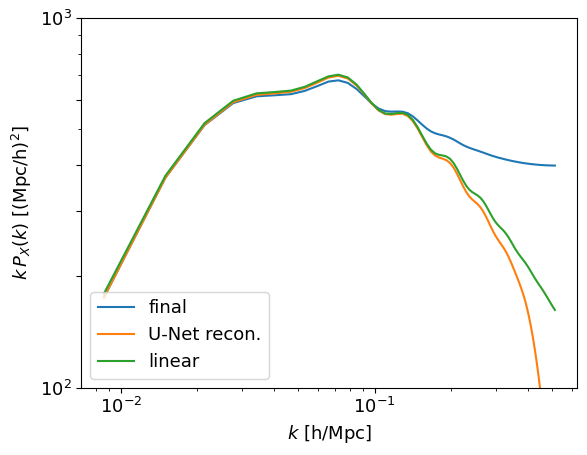

In [11]:
plt.loglog(Pk_k,Pk_k**1 * Pk_fiducial_pre_mean,label='final')
plt.loglog(Pk_k,Pk_k**1 * Pk_fiducial_post_mean,label='U-Net recon.')
plt.loglog(Pk_k,Pk_k**1 * PLinInt(Pk_k),label='linear')
plt.xlabel('$k$ [h/Mpc]')
plt.ylabel('$k\,P_X(k)$ [(Mpc/h)$^2$]')
# plt.grid(linestyle=':')
plt.legend(loc=3)
# plt.xlim(1e-1,5e-1)
plt.ylim(1e2,1e3)
plt.yticks([1e2,2e2,3e2,4e2,6e2,1e3],["$10^2$","","","","","$10^3$"])
plt.savefig('results/P_reconstruction_real.pdf',format='pdf',bbox_inches='tight')
plt.show()

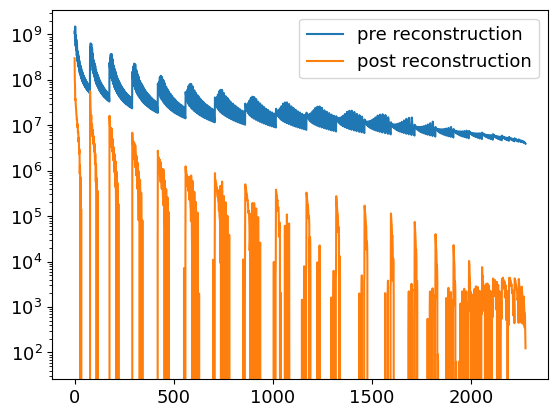

In [12]:
plt.semilogy(Bk_fiducial_pre_mean,label="pre reconstruction")
plt.semilogy(Bk_fiducial_post_mean,label="post reconstruction")
plt.legend()
plt.show()

## Compute the covariance

12500 81 0.9934394751580127
12500 81 0.9934394751580127
12500 162 0.9869589567165373


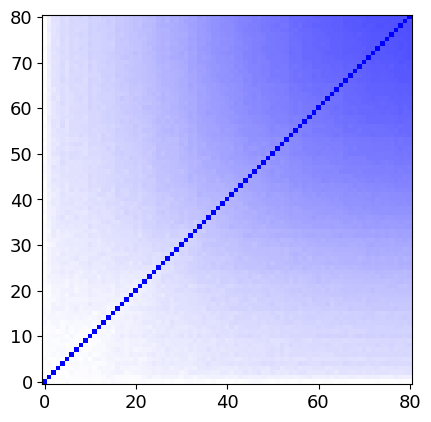

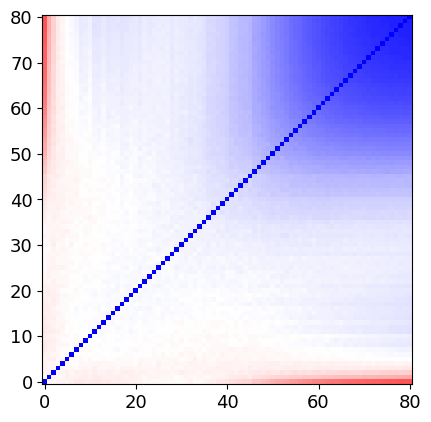

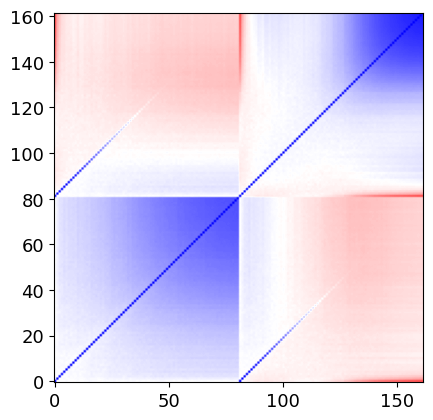

In [15]:
Cov_P_pre = np.cov(Pk_fiducial_pre.T)
Cov_P_pre_Inv = np.linalg.inv(Cov_P_pre)

N_sims = len(Pk_fiducial_pre)
N_bins = len(Cov_P_pre)
hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
print(N_sims,N_bins,hartlapfactor)
Cov_P_pre_Inv_wHartlap = Cov_P_pre_Inv * hartlapfactor

r_P_pre = np.corrcoef(Pk_fiducial_pre.T)

Cov_P_post = np.cov(Pk_fiducial_post.T)
Cov_P_post_Inv = np.linalg.inv(Cov_P_post)

N_sims = len(Pk_fiducial_post)
N_bins = len(Cov_P_post)
hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
print(N_sims,N_bins,hartlapfactor)
Cov_P_post_Inv_wHartlap = Cov_P_post_Inv * hartlapfactor

r_P_post = np.corrcoef(Pk_fiducial_post.T)

Pk_fiducial_both = np.concatenate([Pk_fiducial_pre,Pk_fiducial_post],axis=-1)
Cov_P_both = np.cov(Pk_fiducial_both.T)
Cov_P_both_Inv = np.linalg.inv(Cov_P_both)

N_sims = len(Pk_fiducial_both)
N_bins = len(Cov_P_both)
hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
print(N_sims,N_bins,hartlapfactor)
Cov_P_both_Inv_wHartlap = Cov_P_both_Inv * hartlapfactor

r_P_both = np.corrcoef(Pk_fiducial_both.T)

plt.imshow(r_P_pre,cmap='bwr_r',vmin=-1,vmax=1,origin='lower')
plt.show()
plt.imshow(r_P_post,cmap='bwr_r',vmin=-1,vmax=1,origin='lower')
plt.show()
plt.imshow(r_P_both,cmap='bwr_r',vmin=-1,vmax=1,origin='lower')
plt.show()

12500 2276 0.8178254260340827
12500 2276 0.8178254260340827
12500 4552 0.6357308584686775


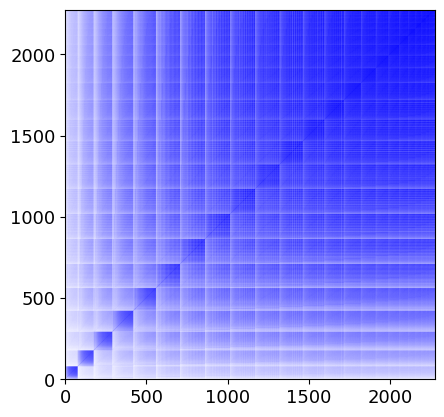

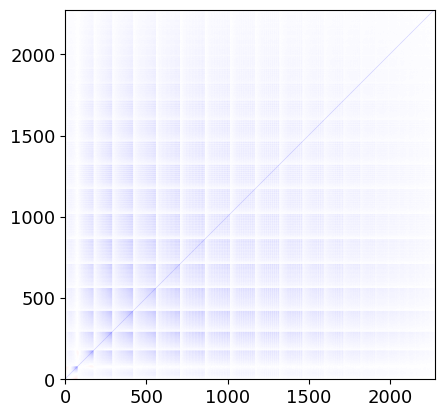

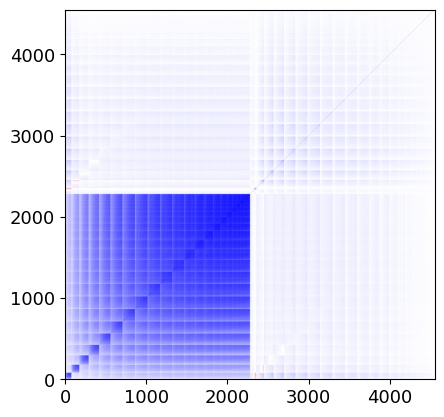

In [16]:
Cov_B_pre = np.cov(Bk_fiducial_pre.T)
Cov_B_pre_Inv = np.linalg.inv(Cov_B_pre)

N_sims = len(Bk_fiducial_pre)
N_bins = len(Cov_B_pre)
hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
print(N_sims,N_bins,hartlapfactor)
Cov_B_pre_Inv_wHartlap = Cov_B_pre_Inv * hartlapfactor

r_B_pre = np.corrcoef(Bk_fiducial_pre.T)

Cov_B_post = np.cov(Bk_fiducial_post.T)
Cov_B_post_Inv = np.linalg.inv(Cov_B_post)

N_sims = len(Bk_fiducial_post)
N_bins = len(Cov_B_post)
hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
print(N_sims,N_bins,hartlapfactor)
Cov_B_post_Inv_wHartlap = Cov_B_post_Inv * hartlapfactor

r_B_post = np.corrcoef(Bk_fiducial_post.T)

Bk_fiducial_both = np.concatenate([Bk_fiducial_pre,Bk_fiducial_post],axis=-1)
Cov_B_both = np.cov(Bk_fiducial_both.T)
Cov_B_both_Inv = np.linalg.inv(Cov_B_both)

N_sims = len(Bk_fiducial_both)
N_bins = len(Cov_B_both)
hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
print(N_sims,N_bins,hartlapfactor)
Cov_B_both_Inv_wHartlap = Cov_B_both_Inv * hartlapfactor

r_B_both = np.corrcoef(Bk_fiducial_both.T)

plt.imshow(r_B_pre,cmap='bwr_r',vmin=-1,vmax=1,origin='lower')
plt.show()
plt.imshow(r_B_post,cmap='bwr_r',vmin=-1,vmax=1,origin='lower')
plt.show()
plt.imshow(r_B_both,cmap='bwr_r',vmin=-1,vmax=1,origin='lower')
plt.show()

12500 2357 0.8113449075926074
12500 2357 0.8113449075926074
12500 4714 0.6227698215857269


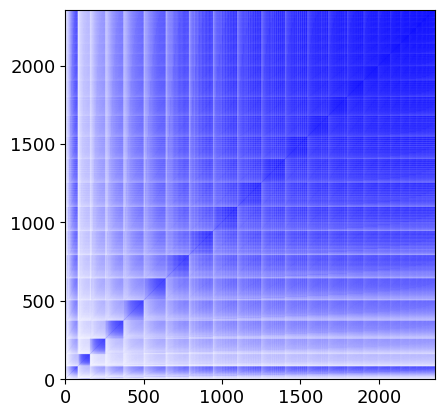

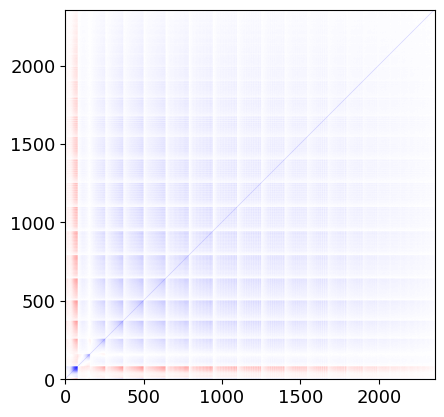

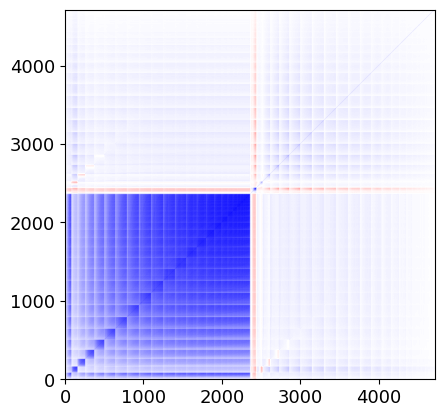

In [17]:
Cov_PB_pre = np.cov(PB_fiducial_pre.T)
Cov_PB_pre_Inv = np.linalg.inv(Cov_PB_pre)

N_sims = len(PB_fiducial_pre)
N_bins = len(Cov_PB_pre)
hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
print(N_sims,N_bins,hartlapfactor)
Cov_PB_pre_Inv_wHartlap = Cov_PB_pre_Inv * hartlapfactor

r_PB_pre = np.corrcoef(PB_fiducial_pre.T)

Cov_PB_post = np.cov(PB_fiducial_post.T)
Cov_PB_post_Inv = np.linalg.inv(Cov_PB_post)

N_sims = len(PB_fiducial_post)
N_bins = len(Cov_PB_post)
hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
print(N_sims,N_bins,hartlapfactor)
Cov_PB_post_Inv_wHartlap = Cov_PB_post_Inv * hartlapfactor

r_PB_post = np.corrcoef(PB_fiducial_post.T)

PB_fiducial_both = np.concatenate([PB_fiducial_pre,PB_fiducial_post],axis=-1)
Cov_PB_both = np.cov(PB_fiducial_both.T)
Cov_PB_both_Inv = np.linalg.inv(Cov_PB_both)

N_sims = len(PB_fiducial_both)
N_bins = len(Cov_PB_both)
hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
print(N_sims,N_bins,hartlapfactor)
Cov_PB_both_Inv_wHartlap = Cov_PB_both_Inv * hartlapfactor

r_PB_both = np.corrcoef(PB_fiducial_both.T)

plt.imshow(r_PB_pre,cmap='bwr_r',vmin=-1,vmax=1,origin='lower')
plt.show()
plt.imshow(r_PB_post,cmap='bwr_r',vmin=-1,vmax=1,origin='lower')
plt.show()
plt.imshow(r_PB_both,cmap='bwr_r',vmin=-1,vmax=1,origin='lower')
plt.show()

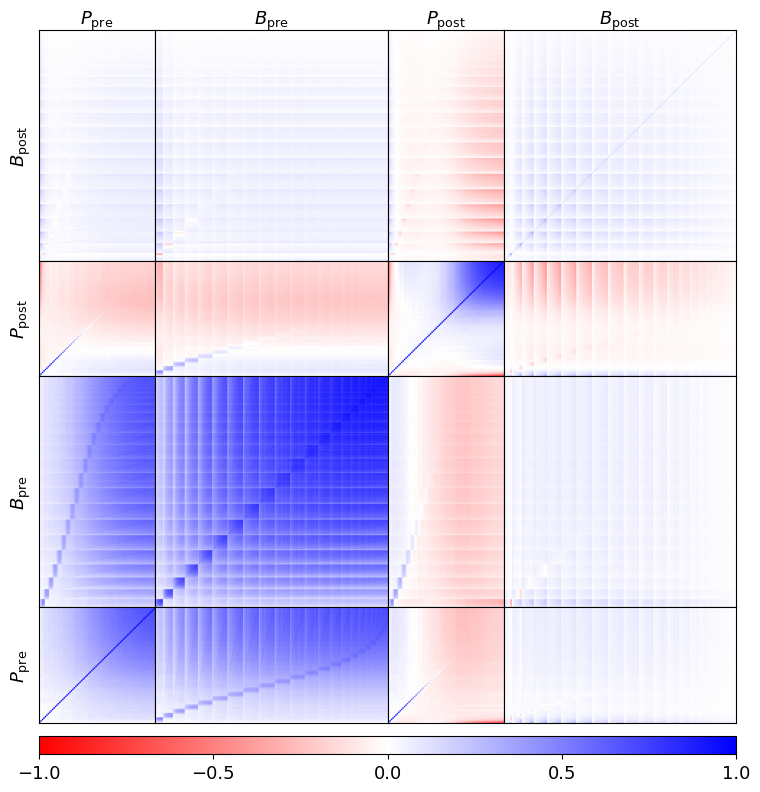

In [18]:
fig, axs = plt.subplots(4, 4, figsize=[9, 9],width_ratios=[1,2,1,2],height_ratios=[2,1,2,1])
fig.subplots_adjust(hspace=0,wspace=0)

for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])
    ax.xaxis.set_label_position('top')
    ax.yaxis.set_label_position('left')

axs[3,0].imshow(r_P_pre,cmap='bwr_r',origin='lower',vmin=-1,vmax=1,aspect='auto')
axs[2,1].imshow(r_B_pre,cmap='bwr_r',origin='lower',vmin=-1,vmax=1,aspect='auto')
axs[1,2].imshow(r_P_post,cmap='bwr_r',origin='lower',vmin=-1,vmax=1,aspect='auto')
axs[0,3].imshow(r_B_post,cmap='bwr_r',origin='lower',vmin=-1,vmax=1,aspect='auto')

axs[1,0].imshow(r_P_both[81:,:81],cmap='bwr_r',origin='lower',vmin=-1,vmax=1,aspect='auto')
axs[3,2].imshow(r_P_both[:81,81:],cmap='bwr_r',origin='lower',vmin=-1,vmax=1,aspect='auto')

axs[0,1].imshow(r_B_both[2276:,:2276],cmap='bwr_r',origin='lower',vmin=-1,vmax=1,aspect='auto')
axs[2,3].imshow(r_B_both[:2276,2276:],cmap='bwr_r',origin='lower',vmin=-1,vmax=1,aspect='auto')

axs[2,0].imshow(r_PB_pre[81:,:81],cmap='bwr_r',origin='lower',vmin=-1,vmax=1,aspect='auto')
axs[3,1].imshow(r_PB_pre[:81,81:],cmap='bwr_r',origin='lower',vmin=-1,vmax=1,aspect='auto')

axs[0,2].imshow(r_PB_post[81:,:81],cmap='bwr_r',origin='lower',vmin=-1,vmax=1,aspect='auto')
axs[1,3].imshow(r_PB_post[:81,81:],cmap='bwr_r',origin='lower',vmin=-1,vmax=1,aspect='auto')

axs[0,0].imshow(r_PB_both[:81,81+len(Cov_PB_pre):].T,cmap='bwr_r',vmin=-1,vmax=1,origin='lower',aspect='auto')
axs[3,3].imshow(r_PB_both[:81,81+len(Cov_PB_pre):],cmap='bwr_r',vmin=-1,vmax=1,origin='lower',aspect='auto')

axs[1,1].imshow(r_PB_both[len(Cov_PB_pre):len(Cov_PB_pre)+81,81:81+len(Cov_B_pre)],cmap='bwr_r',vmin=-1,vmax=1,origin='lower',aspect='auto')
ploty = axs[2,2].imshow(r_PB_both[len(Cov_PB_pre):len(Cov_PB_pre)+81,81:81+len(Cov_B_pre)].T,cmap='bwr_r',vmin=-1,vmax=1,origin='lower',aspect='auto')

axs[0,0].set_xlabel("$P_{\\rm pre}$")
axs[0,1].set_xlabel("$B_{\\rm pre}$")
axs[0,2].set_xlabel("$P_{\\rm post}$")
axs[0,3].set_xlabel("$B_{\\rm post}$")

axs[0,0].set_ylabel("$B_{\\rm post}$")
axs[1,0].set_ylabel("$P_{\\rm post}$")
axs[2,0].set_ylabel("$B_{\\rm pre}$")
axs[3,0].set_ylabel("$P_{\\rm pre}$")
cbar_ax = fig.add_axes([0.125, 0.075, 0.775, 0.02])
fig.colorbar(ploty,cax=cbar_ax,ticks=[-1,-0.5,0,0.5,1],location='bottom')
plt.savefig("results/r_all.pdf",format='pdf',bbox_inches='tight')
plt.show()

## Compute the derivatives with respect to parameters

In [19]:
params = ["$f_{\\rm NL}^{\\rm local}$","$f_{\\rm NL}^{\\rm equil}$","$f_{\\rm NL}^{\\rm orth}$","h","$n_{s}$","$\\Omega_{m}$","$\\Omega_{b}$","$\\sigma_{8}$"]
means = [0,0,0,0.6711,0.9624,0.3175,0.049,0.834]

In [20]:
dPdf_pre = np.zeros((8,Pk_fiducial_pre_mean.shape[0]))
dPdf_pre[0] = (Pk_LC_p_pre_mean - Pk_LC_m_pre_mean)/200.
dPdf_pre[1] = (Pk_EQ_p_pre_mean - Pk_EQ_m_pre_mean)/200.
dPdf_pre[2] = (Pk_OR_LSS_p_pre_mean - Pk_OR_LSS_m_pre_mean)/200.
dPdf_pre[3] = (Pk_h_p_pre_mean - Pk_h_m_pre_mean)/(0.6911-0.6511)
dPdf_pre[4] = (Pk_ns_p_pre_mean - Pk_ns_m_pre_mean)/(0.9824-0.9424)
dPdf_pre[5] = (Pk_Om_p_pre_mean - Pk_Om_m_pre_mean)/(0.3275-0.3075)
dPdf_pre[6] = (Pk_Ob2_p_pre_mean - Pk_Ob2_m_pre_mean)/(0.051-0.047)
dPdf_pre[7] = (Pk_s8_p_pre_mean - Pk_s8_m_pre_mean)/(0.849-0.819)

dPdf_post = np.zeros((8,Pk_fiducial_post_mean.shape[0]))
dPdf_post[0] = (Pk_LC_p_post_mean - Pk_LC_m_post_mean)/200.
dPdf_post[1] = (Pk_EQ_p_post_mean - Pk_EQ_m_post_mean)/200.
dPdf_post[2] = (Pk_OR_LSS_p_post_mean - Pk_OR_LSS_m_post_mean)/200.
dPdf_post[3] = (Pk_h_p_post_mean - Pk_h_m_post_mean)/(0.6911-0.6511)
dPdf_post[4] = (Pk_ns_p_post_mean - Pk_ns_m_post_mean)/(0.9824-0.9424)
dPdf_post[5] = (Pk_Om_p_post_mean - Pk_Om_m_post_mean)/(0.3275-0.3075)
dPdf_post[6] = (Pk_Ob2_p_post_mean - Pk_Ob2_m_post_mean)/(0.051-0.047)
dPdf_post[7] = (Pk_s8_p_post_mean - Pk_s8_m_post_mean)/(0.849-0.819)

dPdf_both = np.concatenate([dPdf_pre,dPdf_post],axis=-1)

In [21]:
dBdf_pre = np.zeros((8,Bk_fiducial_pre_mean.shape[0]))
dBdf_pre[0] = (Bk_LC_p_pre_mean - Bk_LC_m_pre_mean)/200.
dBdf_pre[1] = (Bk_EQ_p_pre_mean - Bk_EQ_m_pre_mean)/200.
dBdf_pre[2] = (Bk_OR_LSS_p_pre_mean - Bk_OR_LSS_m_pre_mean)/200.
dBdf_pre[3] = (Bk_h_p_pre_mean - Bk_h_m_pre_mean)/(0.6911-0.6511)
dBdf_pre[4] = (Bk_ns_p_pre_mean - Bk_ns_m_pre_mean)/(0.9824-0.9424)
dBdf_pre[5] = (Bk_Om_p_pre_mean - Bk_Om_m_pre_mean)/(0.3275-0.3075)
dBdf_pre[6] = (Bk_Ob2_p_pre_mean - Bk_Ob2_m_pre_mean)/(0.051-0.047)
dBdf_pre[7] = (Bk_s8_p_pre_mean - Bk_s8_m_pre_mean)/(0.849-0.819)

dBdf_post = np.zeros((8,Bk_fiducial_post_mean.shape[0]))
dBdf_post[0] = (Bk_LC_p_post_mean - Bk_LC_m_post_mean)/200.
dBdf_post[1] = (Bk_EQ_p_post_mean - Bk_EQ_m_post_mean)/200.
dBdf_post[2] = (Bk_OR_LSS_p_post_mean - Bk_OR_LSS_m_post_mean)/200.
dBdf_post[3] = (Bk_h_p_post_mean - Bk_h_m_post_mean)/(0.6911-0.6511)
dBdf_post[4] = (Bk_ns_p_post_mean - Bk_ns_m_post_mean)/(0.9824-0.9424)
dBdf_post[5] = (Bk_Om_p_post_mean - Bk_Om_m_post_mean)/(0.3275-0.3075)
dBdf_post[6] = (Bk_Ob2_p_post_mean - Bk_Ob2_m_post_mean)/(0.051-0.047)
dBdf_post[7] = (Bk_s8_p_post_mean - Bk_s8_m_post_mean)/(0.849-0.819)

dBdf_both = np.concatenate([dBdf_pre,dBdf_post],axis=-1)

In [22]:
dPBdf_pre = np.zeros((8,PB_fiducial_pre_mean.shape[0]))
dPBdf_pre[0] = (PB_LC_p_pre_mean - PB_LC_m_pre_mean)/200.
dPBdf_pre[1] = (PB_EQ_p_pre_mean - PB_EQ_m_pre_mean)/200.
dPBdf_pre[2] = (PB_OR_LSS_p_pre_mean - PB_OR_LSS_m_pre_mean)/200.
dPBdf_pre[3] = (PB_h_p_pre_mean - PB_h_m_pre_mean)/(0.6911-0.6511)
dPBdf_pre[4] = (PB_ns_p_pre_mean - PB_ns_m_pre_mean)/(0.9824-0.9424)
dPBdf_pre[5] = (PB_Om_p_pre_mean - PB_Om_m_pre_mean)/(0.3275-0.3075)
dPBdf_pre[6] = (PB_Ob2_p_pre_mean - PB_Ob2_m_pre_mean)/(0.051-0.047)
dPBdf_pre[7] = (PB_s8_p_pre_mean - PB_s8_m_pre_mean)/(0.849-0.819)

dPBdf_post = np.zeros((8,PB_fiducial_post_mean.shape[0]))
dPBdf_post[0] = (PB_LC_p_post_mean - PB_LC_m_post_mean)/200.
dPBdf_post[1] = (PB_EQ_p_post_mean - PB_EQ_m_post_mean)/200.
dPBdf_post[2] = (PB_OR_LSS_p_post_mean - PB_OR_LSS_m_post_mean)/200.
dPBdf_post[3] = (PB_h_p_post_mean - PB_h_m_post_mean)/(0.6911-0.6511)
dPBdf_post[4] = (PB_ns_p_post_mean - PB_ns_m_post_mean)/(0.9824-0.9424)
dPBdf_post[5] = (PB_Om_p_post_mean - PB_Om_m_post_mean)/(0.3275-0.3075)
dPBdf_post[6] = (PB_Ob2_p_post_mean - PB_Ob2_m_post_mean)/(0.051-0.047)
dPBdf_post[7] = (PB_s8_p_post_mean - PB_s8_m_post_mean)/(0.849-0.819)

dPBdf_both = np.concatenate([dPBdf_pre,dPBdf_post],axis=-1)

## Compute the Fisher Matrices

In [23]:
Fish_P_pre = dPdf_pre.dot(Cov_P_pre_Inv_wHartlap).dot(dPdf_pre.T)
Fish_P_post = dPdf_post.dot(Cov_P_post_Inv_wHartlap).dot(dPdf_post.T)
Fish_P_both = dPdf_both.dot(Cov_P_both_Inv_wHartlap).dot(dPdf_both.T)

Fish_P_pre_Inv = np.linalg.inv(Fish_P_pre)
Fish_P_post_Inv = np.linalg.inv(Fish_P_post)
Fish_P_both_Inv = np.linalg.inv(Fish_P_both)

In [24]:
Fish_B_pre = dBdf_pre.dot(Cov_B_pre_Inv_wHartlap).dot(dBdf_pre.T)
Fish_B_post = dBdf_post.dot(Cov_B_post_Inv_wHartlap).dot(dBdf_post.T)
Fish_B_both = dBdf_both.dot(Cov_B_both_Inv_wHartlap).dot(dBdf_both.T)

Fish_B_pre_Inv = np.linalg.inv(Fish_B_pre)
Fish_B_post_Inv = np.linalg.inv(Fish_B_post)
Fish_B_both_Inv = np.linalg.inv(Fish_B_both)

In [25]:
Fish_PB_pre = dPBdf_pre.dot(Cov_PB_pre_Inv_wHartlap).dot(dPBdf_pre.T)
Fish_PB_post = dPBdf_post.dot(Cov_PB_post_Inv_wHartlap).dot(dPBdf_post.T)
Fish_PB_both = dPBdf_both.dot(Cov_PB_both_Inv_wHartlap).dot(dPBdf_both.T)

Fish_PB_pre_Inv = np.linalg.inv(Fish_PB_pre)
Fish_PB_post_Inv = np.linalg.inv(Fish_PB_post)
Fish_PB_both_Inv = np.linalg.inv(Fish_PB_both)

In [26]:
from IPython.display import display, Latex

for i,param in enumerate(params):
    display(Latex(param))
    print("\t P")
    for fishy in [Fish_P_pre,Fish_P_post,Fish_P_both]:
        fishy_inv = np.linalg.inv(fishy)
        print(fishy_inv[i,i]**.5,fishy[i,i]**-.5,)
        
    print("\t B")
    for fishy in [Fish_B_pre,Fish_B_post,Fish_B_both]:
        fishy_inv = np.linalg.inv(fishy)
        print(fishy_inv[i,i]**.5,fishy[i,i]**-.5,)
        
    print("\t PB")
    for fishy in [Fish_PB_pre,Fish_PB_post,Fish_PB_both]:
        fishy_inv = np.linalg.inv(fishy)
        print(fishy_inv[i,i]**.5,fishy[i,i]**-.5,)

<IPython.core.display.Latex object>

	 P
2883.767816587861 31.314695293001055
1889.978964311242 69.1075002737122
135.61717438424256 29.057819198891664
	 B
101.82983484028001 42.65239420908954
18.34649388522495 16.858731366791893
16.93550581186436 15.610444778521638
	 PB
51.644373815284325 24.446424754082678
17.104603096586185 15.612427073647332
14.142389686244629 12.77382394354733


<IPython.core.display.Latex object>

	 P
7888.210283637145 79.40598363005601
3500.406292600264 165.5118731425615
481.1562562495023 76.93610680328477
	 B
187.7098959609594 123.78291233363721
72.63216512044156 34.24754986395606
60.64518268361174 33.05387926460547
	 PB
159.2729002425883 59.772245025181185
64.73059317812498 32.582082355115034
45.005112370350375 30.2111060039376


<IPython.core.display.Latex object>

	 P
3477.9738626289227 187.16693940804427
571.6974185466734 117.24032217248012
175.34847091274966 77.70483880836986
	 B
83.39124947904388 61.38927854309287
26.76429844237483 16.851821788164024
22.03404729164596 15.510556091328763
	 PB
49.075877741030915 42.5600271338763
22.58074821547362 15.485584115992046
16.931446869280105 13.903508552966432


<IPython.core.display.Latex object>

	 P
0.42560902283053986 0.011244629639915241
0.07555594214035266 0.010030275871769983
0.051191227978574436 0.008373853369462022
	 B
0.16283753090457037 0.015103374987715919
0.11589754707701301 0.010700604920617088
0.08427061835295432 0.009721135446939007
	 PB
0.0869713678621172 0.008544784104790057
0.0370805088309144 0.007997436102182839
0.03585933216934281 0.006137376640730156


<IPython.core.display.Latex object>

	 P
0.48128617081368325 0.008906178202967463
0.10503587411641978 0.009465423191897995
0.060638764188525554 0.007308635768790194
	 B
0.15027214172698922 0.01296375035267927
0.07810260683462036 0.008014685229954969
0.062039834518108856 0.007389594306691265
	 PB
0.062124469578811126 0.0065742077604573545
0.03596771670151883 0.006485270697936854
0.03140355863261595 0.004822559477049129


<IPython.core.display.Latex object>

	 P
0.06652955028308133 0.004226336027750359
0.020264763584627497 0.0037568481817961117
0.01271428180110534 0.0032040096593662216
	 B
0.02669840612149525 0.005484228174559009
0.017919846832909158 0.003986460529584659
0.013661983675839219 0.0036442697529852877
	 PB
0.013086078789459358 0.0032470394181542996
0.008551402856475257 0.0030418146346602023
0.008001954401877648 0.0023728286615687984


<IPython.core.display.Latex object>

	 P
0.031312089232329476 0.002411633644012107
0.004505746630369177 0.0014580146614617655
0.0037064028017807222 0.001362684618620131
	 B
0.013234179933716495 0.002747834557833429
0.01155275528285085 0.0023997544258532043
0.008062555167779524 0.002040930516267656
	 PB
0.00832665304978638 0.0018590464415812848
0.003281557511237549 0.0013525957169874692
0.0032532819212769417 0.0011818917446397366


<IPython.core.display.Latex object>

	 P
0.0823046089171048 0.00210038171411407
0.035112063398704374 0.005394699210227056
0.005884009345312364 0.0017133353605958096
	 B
0.00853303778430262 0.0030180584445677608
0.005811446010644694 0.003371684463693981
0.003029608474962235 0.0022466614566563326
	 PB
0.002996522232875673 0.0014582842265120043
0.004242470085368856 0.00283246329001071
0.0015693210543989027 0.0011877308335526435


In [27]:
from IPython.display import display, Latex

for i,param in enumerate(params):
    display(Latex(param))
    print("\t P")
    for fishy in [Fish_P_pre,Fish_P_post,Fish_P_both]:
        fishy_inv = np.linalg.inv(fishy)
        print(fishy_inv[i,i]**.5,fishy[i,i]**-.5,)
        
    print("\t B")
    for fishy in [Fish_B_pre,Fish_B_post,Fish_B_both]:
        fishy_inv = np.linalg.inv(fishy)
        print(fishy_inv[i,i]**.5,fishy[i,i]**-.5,)
        
    print("\t PB")
    for fishy in [Fish_PB_pre,Fish_PB_post,Fish_PB_both]:
        fishy_inv = np.linalg.inv(fishy)
        print(fishy_inv[i,i]**.5,fishy[i,i]**-.5,)

<IPython.core.display.Latex object>

	 P
2883.767816587861 31.314695293001055
1889.978964311242 69.1075002737122
135.61717438424256 29.057819198891664
	 B
101.82983484028001 42.65239420908954
18.34649388522495 16.858731366791893
16.93550581186436 15.610444778521638
	 PB
51.644373815284325 24.446424754082678
17.104603096586185 15.612427073647332
14.142389686244629 12.77382394354733


<IPython.core.display.Latex object>

	 P
7888.210283637145 79.40598363005601
3500.406292600264 165.5118731425615
481.1562562495023 76.93610680328477
	 B
187.7098959609594 123.78291233363721
72.63216512044156 34.24754986395606
60.64518268361174 33.05387926460547
	 PB
159.2729002425883 59.772245025181185
64.73059317812498 32.582082355115034
45.005112370350375 30.2111060039376


<IPython.core.display.Latex object>

	 P
3477.9738626289227 187.16693940804427
571.6974185466734 117.24032217248012
175.34847091274966 77.70483880836986
	 B
83.39124947904388 61.38927854309287
26.76429844237483 16.851821788164024
22.03404729164596 15.510556091328763
	 PB
49.075877741030915 42.5600271338763
22.58074821547362 15.485584115992046
16.931446869280105 13.903508552966432


<IPython.core.display.Latex object>

	 P
0.42560902283053986 0.011244629639915241
0.07555594214035266 0.010030275871769983
0.051191227978574436 0.008373853369462022
	 B
0.16283753090457037 0.015103374987715919
0.11589754707701301 0.010700604920617088
0.08427061835295432 0.009721135446939007
	 PB
0.0869713678621172 0.008544784104790057
0.0370805088309144 0.007997436102182839
0.03585933216934281 0.006137376640730156


<IPython.core.display.Latex object>

	 P
0.48128617081368325 0.008906178202967463
0.10503587411641978 0.009465423191897995
0.060638764188525554 0.007308635768790194
	 B
0.15027214172698922 0.01296375035267927
0.07810260683462036 0.008014685229954969
0.062039834518108856 0.007389594306691265
	 PB
0.062124469578811126 0.0065742077604573545
0.03596771670151883 0.006485270697936854
0.03140355863261595 0.004822559477049129


<IPython.core.display.Latex object>

	 P
0.06652955028308133 0.004226336027750359
0.020264763584627497 0.0037568481817961117
0.01271428180110534 0.0032040096593662216
	 B
0.02669840612149525 0.005484228174559009
0.017919846832909158 0.003986460529584659
0.013661983675839219 0.0036442697529852877
	 PB
0.013086078789459358 0.0032470394181542996
0.008551402856475257 0.0030418146346602023
0.008001954401877648 0.0023728286615687984


<IPython.core.display.Latex object>

	 P
0.031312089232329476 0.002411633644012107
0.004505746630369177 0.0014580146614617655
0.0037064028017807222 0.001362684618620131
	 B
0.013234179933716495 0.002747834557833429
0.01155275528285085 0.0023997544258532043
0.008062555167779524 0.002040930516267656
	 PB
0.00832665304978638 0.0018590464415812848
0.003281557511237549 0.0013525957169874692
0.0032532819212769417 0.0011818917446397366


<IPython.core.display.Latex object>

	 P
0.0823046089171048 0.00210038171411407
0.035112063398704374 0.005394699210227056
0.005884009345312364 0.0017133353605958096
	 B
0.00853303778430262 0.0030180584445677608
0.005811446010644694 0.003371684463693981
0.003029608474962235 0.0022466614566563326
	 PB
0.002996522232875673 0.0014582842265120043
0.004242470085368856 0.00283246329001071
0.0015693210543989027 0.0011877308335526435


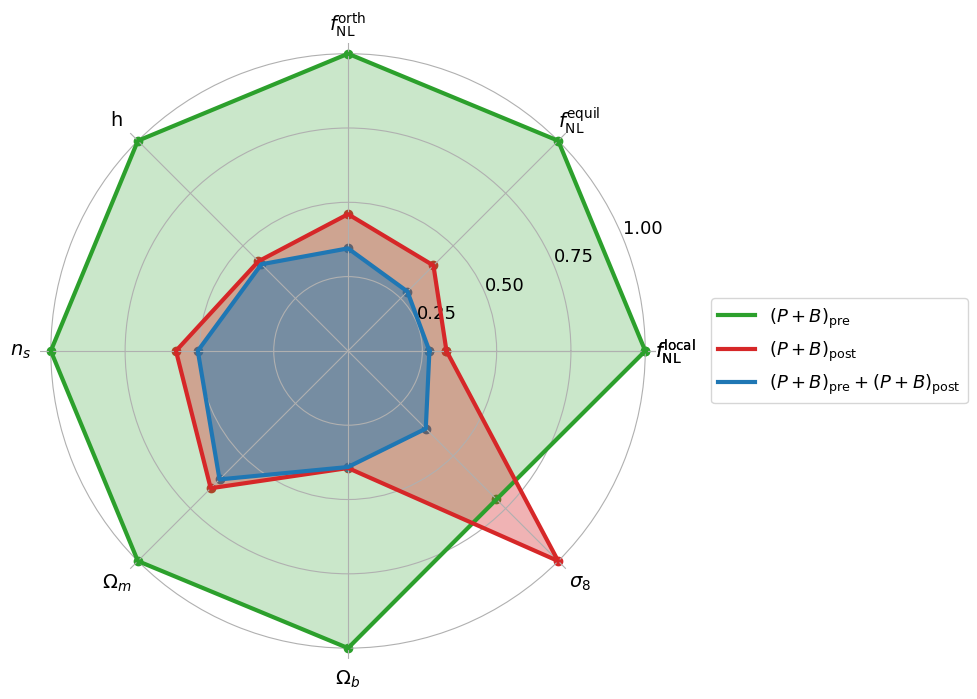

In [36]:
categories = params
categories = [*categories, categories[0]]

onesig_prepostboth = np.stack([np.diag(Fish_PB_pre_Inv)**.5,np.diag(Fish_PB_post_Inv)**.5,np.diag(Fish_PB_both_Inv)**.5])
restaurant_1 = np.diag(Fish_PB_pre_Inv)**.5 / onesig_prepostboth.max(0)
restaurant_2 = np.diag(Fish_PB_post_Inv)**.5 / onesig_prepostboth.max(0)
restaurant_3 = np.diag(Fish_PB_both_Inv)**.5 / onesig_prepostboth.max(0)
restaurant_1 = [*restaurant_1, restaurant_1[0]]
restaurant_2 = [*restaurant_2, restaurant_2[0]]
restaurant_3 = [*restaurant_3, restaurant_3[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(restaurant_1))

plt.figure(figsize=(8, 8))
ax =plt.subplot(polar=True)
plt.plot(label_loc, restaurant_1, label='Restaurant 1',color='tab:green',linewidth=3)
plt.plot(label_loc, restaurant_2, label='Restaurant 2',color='tab:red',linewidth=3)
plt.plot(label_loc, restaurant_3, label='Restaurant 3',color='tab:blue',linewidth=3)
plt.scatter(label_loc,restaurant_1,color='tab:green')
plt.scatter(label_loc,restaurant_2,color='tab:red')
plt.scatter(label_loc,restaurant_3,color='tab:blue')
plt.fill(label_loc,restaurant_1,color='tab:green',alpha=.25)
plt.fill(label_loc,restaurant_2,color='tab:red',alpha=.35)
plt.fill(label_loc,restaurant_3,color='tab:blue',alpha=.5)
# plt.title('Relative $1\\sigma$-errors \n', fontsize=16, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories,fontsize=14)
# plt.legend(['$P_{\\rm{pre}}$','$P_{\\rm{post}}$','$P_{\\rm{pre}}+P_{\\rm{post}}$'],bbox_to_anchor=[1.3,0.0],ncols=3)
plt.legend(['$(P+B)_{\\rm pre}$','$(P+B)_{\\rm post}$','$(P+B)_{\\rm pre}+(P+B)_{\\rm post}$'],bbox_to_anchor=[1.075,0.6])
ax.spines['polar'].set_visible(False)
ax.set_rticks([0.25,0.5,0.75,1])
plt.savefig('results/radarplot_PB.pdf',format='pdf',bbox_inches='tight')
plt.show()

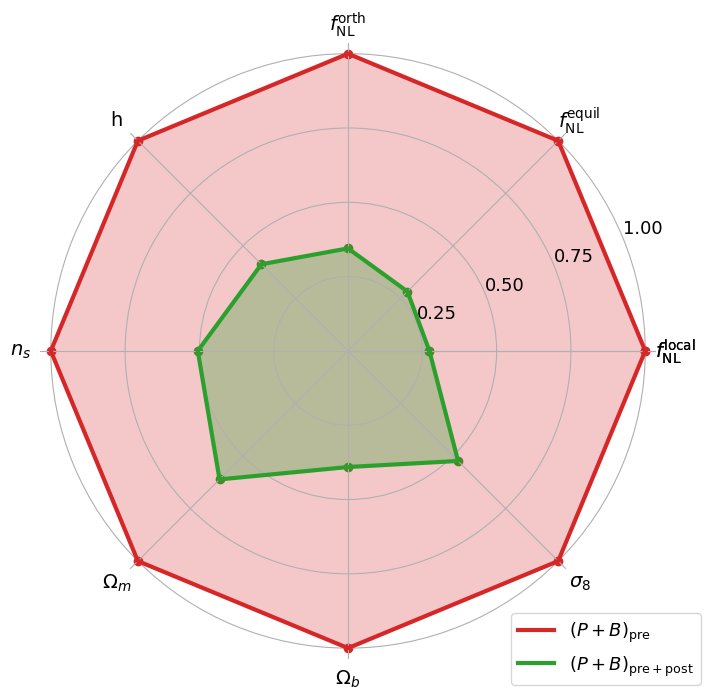

In [56]:
categories = params
categories = [*categories, categories[0]]

onesig_prepostboth = np.stack([np.diag(Fish_PB_pre_Inv)**.5,np.diag(Fish_PB_both_Inv)**.5])
restaurant_1 = np.diag(Fish_PB_pre_Inv)**.5 / onesig_prepostboth.max(0)
# restaurant_2 = np.diag(Fish_PB_post_Inv)**.5 / onesig_prepostboth.max(0)
restaurant_3 = np.diag(Fish_PB_both_Inv)**.5 / onesig_prepostboth.max(0)
restaurant_1 = [*restaurant_1, restaurant_1[0]]
# restaurant_2 = [*restaurant_2, restaurant_2[0]]
restaurant_3 = [*restaurant_3, restaurant_3[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(restaurant_1))

plt.figure(figsize=(8, 8))
ax =plt.subplot(polar=True)
plt.plot(label_loc, restaurant_1, label='Restaurant 1',color='tab:red',linewidth=3)
# plt.plot(label_loc, restaurant_2, label='Restaurant 2',color='tab:red',linewidth=3)
plt.plot(label_loc, restaurant_3, label='Restaurant 3',color='tab:green',linewidth=3)
plt.scatter(label_loc,restaurant_1,color='tab:red')
# plt.scatter(label_loc,restaurant_2,color='tab:red')
plt.scatter(label_loc,restaurant_3,color='tab:green')
plt.fill(label_loc,restaurant_1,color='tab:red',alpha=.25)
# plt.fill(label_loc,restaurant_2,color='tab:red',alpha=.35)
plt.fill(label_loc,restaurant_3,color='tab:green',alpha=.3)
# plt.title('Relative $1\\sigma$-errors \n', fontsize=16, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories,fontsize=14)
# plt.legend(['$P_{\\rm{pre}}$','$P_{\\rm{post}}$','$P_{\\rm{pre}}+P_{\\rm{post}}$'],bbox_to_anchor=[1.3,0.0],ncols=3)
plt.legend(['$(P+B)_{\\rm pre}$','$(P+B)_{\\rm pre + post}$'],bbox_to_anchor=[0.75,0.089])
ax.spines['polar'].set_visible(False)
ax.set_rticks([0.25,0.5,0.75,1])
plt.savefig('results/radarplot_PB_RS.pdf',format='pdf',bbox_inches='tight')
plt.show()

## Show the correlation coefficients

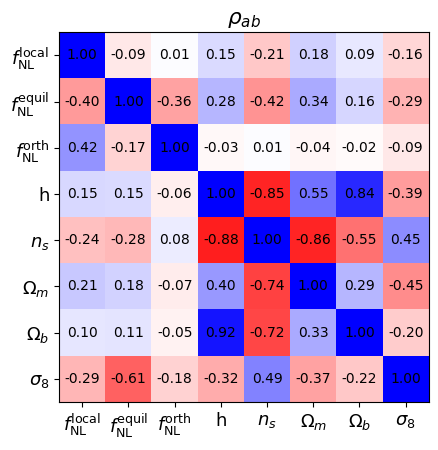

In [32]:
rho_pre = Fish_PB_pre_Inv/np.sqrt(np.outer(np.diag(Fish_PB_pre_Inv),np.diag(Fish_PB_pre_Inv)))
rho_post = Fish_PB_post_Inv/np.sqrt(np.outer(np.diag(Fish_PB_post_Inv),np.diag(Fish_PB_post_Inv)))
rho_both = Fish_PB_both_Inv/np.sqrt(np.outer(np.diag(Fish_PB_both_Inv),np.diag(Fish_PB_both_Inv)))

rho_prepost = np.tril(rho_pre) + np.triu(rho_post) - np.diag(np.ones(8))
rho_preboth = np.tril(rho_pre) + np.triu(rho_both) - np.diag(np.ones(8))

# plt.imshow(rho_prepost,cmap='bwr_r',origin='upper',vmin=-1,vmax=1)
# plt.xticks(np.arange(8),params)
# plt.yticks(np.arange(8),params)
# plt.title('$\\rho_{ab}$')
# for (j,i),label in np.ndenumerate(rho_prepost):
#     plt.text(i,j,f"{label:.2f}",ha='center',va='center',fontsize=10) 
# plt.savefig('results/rhoab_prepost.pdf',format='pdf',bbox_inches='tight')
# plt.show()

plt.imshow(rho_preboth,cmap='bwr_r',origin='upper',vmin=-1,vmax=1)
plt.xticks(np.arange(8),params)
plt.yticks(np.arange(8),params)
plt.title('$\\rho_{ab}$')
for (j,i),label in np.ndenumerate(rho_preboth):
    plt.text(i,j,f"{label:.2f}",ha='center',va='center',fontsize=10) 
plt.savefig('results/rhoab_preboth.pdf',format='pdf',bbox_inches='tight')
plt.show()

## Make the corner plots

In [33]:
from plot_ellipse import plot_ellipse

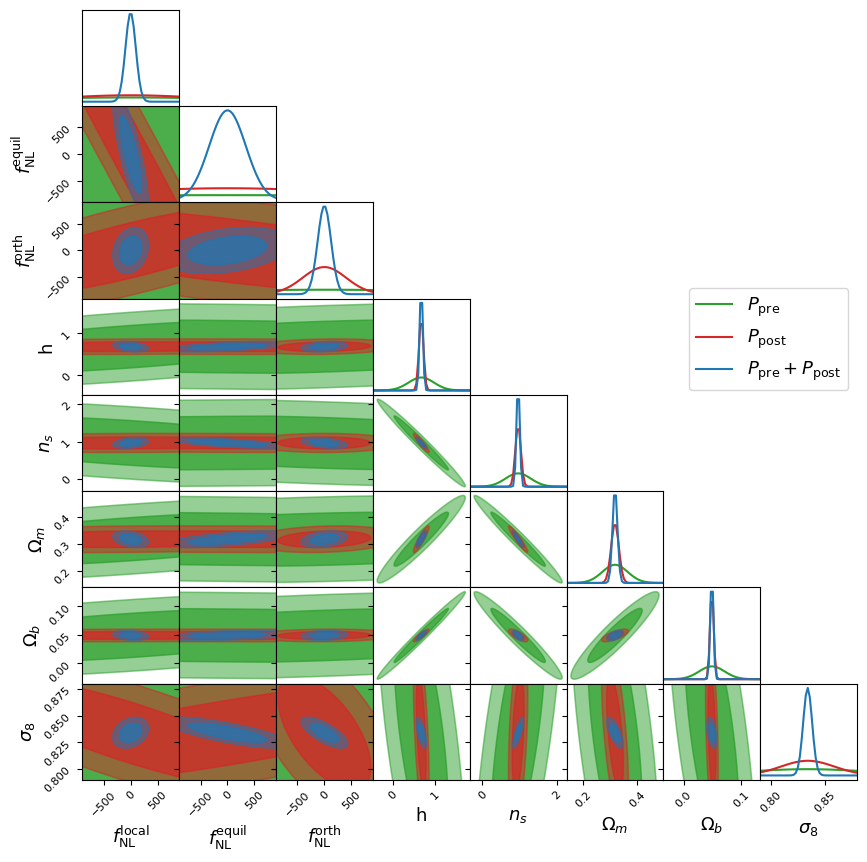

In [34]:
fig, axes = plt.subplots(figsize=(10, 10), sharey='row', sharex='col', ncols=8, nrows=8)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

x = np.linspace(0, 10, 100)
axes[0,0].set_yticks([])
for i in range(8):
    axes[i,0].set_ylabel(params[i])
    for j in range(8):
        axes[i,j].tick_params(axis='both', which='major', labelsize=8,rotation=45)
        # ax.tick_params(axis='both', which='minor', labelsize=8)
        if i<=j:
            axes[i, j].axis('off')
        else:

            axes[i,j].set_xlabel(params[j])
            
            
            C = Fish_P_pre_Inv[[j,i],:][:,[j,i]]
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:green'}, fill_kwargs={'alpha':0.5,'c':'tab:green'})
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:green'}, fill_kwargs={'alpha':0.7,'c':'tab:green'})
            
            C = Fish_P_post_Inv[[j,i],:][:,[j,i]]
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.5,'c':'tab:red'})
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.7,'c':'tab:red'})
            
            C = Fish_P_both_Inv[[j,i],:][:,[j,i]]
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:blue'}, fill_kwargs={'alpha':0.5,'c':'tab:blue'})
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:blue'}, fill_kwargs={'alpha':0.7,'c':'tab:blue'})
            # C = FishNG_PB_mix_Inv[-1][[j,i],:][:,[j,i]]
            # plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.3,'c':'tab:red'})
            # plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.5,'c':'tab:red'})

axes[1,0].set_ylim(-900,900)
axes[0,0].set_xlim(-900,900)
axes[1,1].set_xlim(-900,900)
axes[2,2].set_xlim(-900,900)
axes[2,0].set_ylim(-900,900)
axes[-1,0].set_ylim(0.79,0.88)               
            
axes[0,0].set_ylim(axes[0,0].get_xlim())
axes[-1,-1].set_xlim(axes[-1,-1].get_ylim())
a=1
for i in range(8):
    for j in range(8):
        if i==j:
            ax1 = fig.add_subplot(8,8,a)
            xlims = axes[i,i].get_xlim()
            ax1.set_xlim(xlims)
            ax1.set_yticks([])
            if i!=7: ax1.set_xticks([])
            ax1.tick_params(axis='both', which='major', labelsize=8,rotation=45)
            xx = np.linspace(xlims[0],xlims[1])
    
            
            sigma2 = Fish_P_pre_Inv[i,i]
            ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2)/sigma2**.5,'tab:green')
            
            sigma2 = Fish_P_post_Inv[i,i]
            ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2)/sigma2**.5,'tab:red')
            
            sigma2 = Fish_P_both_Inv[i,i]
            ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2)/sigma2**.5,'tab:blue')
            
            # sigma2 = FishNG_PB_mix_Inv[-1][i,i]
            # ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2),'tab:red')
        a+=1 
ax1.set_xlabel(params[-1])
plt.legend(['$P_{\\rm{pre}}$','$P_{\\rm{post}}$','$P_{\\rm{pre}}+P_{\\rm{post}}$'],bbox_to_anchor=[1.0,5.2])
plt.savefig('results/cornerplot_P.pdf',format='pdf',bbox_inches='tight')
plt.show()

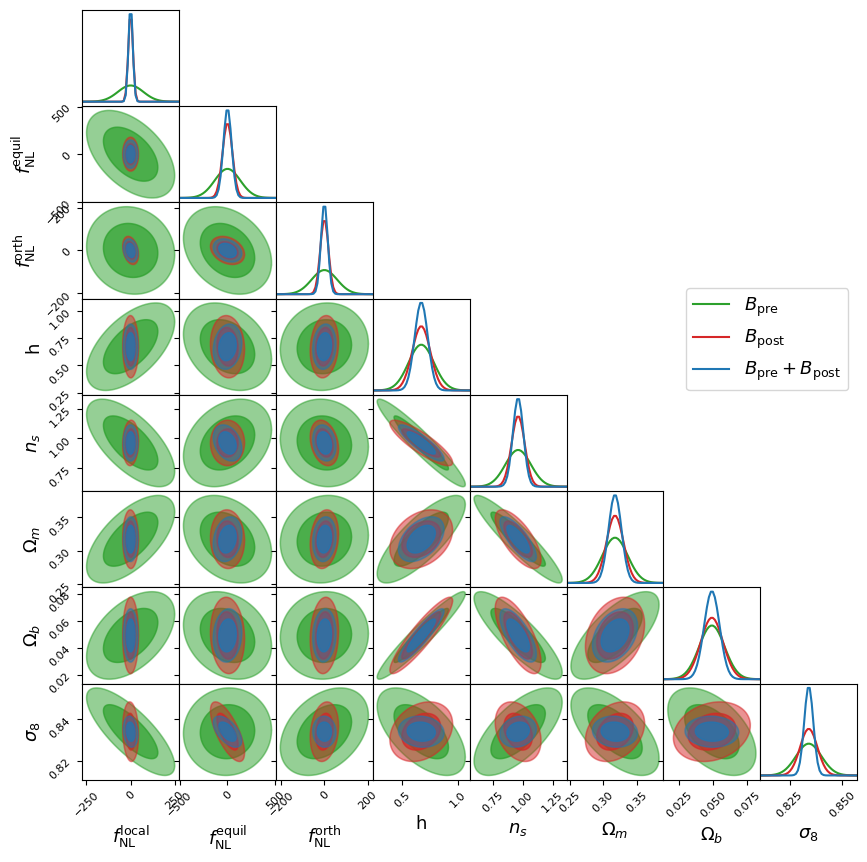

In [35]:
fig, axes = plt.subplots(figsize=(10, 10), sharey='row', sharex='col', ncols=8, nrows=8)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

x = np.linspace(0, 10, 100)
axes[0,0].set_yticks([])
for i in range(8):
    axes[i,0].set_ylabel(params[i])
    for j in range(8):
        axes[i,j].tick_params(axis='both', which='major', labelsize=8,rotation=45)
        # ax.tick_params(axis='both', which='minor', labelsize=8)
        if i<=j:
            axes[i, j].axis('off')
        else:

            axes[i,j].set_xlabel(params[j])
            
            
            C = Fish_B_pre_Inv[[j,i],:][:,[j,i]]
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:green'}, fill_kwargs={'alpha':0.5,'c':'tab:green'})
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:green'}, fill_kwargs={'alpha':0.7,'c':'tab:green'})
            
            C = Fish_B_post_Inv[[j,i],:][:,[j,i]]
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.5,'c':'tab:red'})
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.7,'c':'tab:red'})
            
            C = Fish_B_both_Inv[[j,i],:][:,[j,i]]
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:blue'}, fill_kwargs={'alpha':0.5,'c':'tab:blue'})
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:blue'}, fill_kwargs={'alpha':0.7,'c':'tab:blue'})
            # C = FishNG_PB_mix_Inv[-1][[j,i],:][:,[j,i]]
            # plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.3,'c':'tab:red'})
            # plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.5,'c':'tab:red'})
axes[0,0].set_ylim(axes[0,0].get_xlim())
axes[-1,-1].set_xlim(axes[-1,-1].get_ylim())
a=1
for i in range(8):
    for j in range(8):
        if i==j:
            ax1 = fig.add_subplot(8,8,a)
            xlims = axes[i,i].get_xlim()
            ax1.set_xlim(xlims)
            ax1.set_yticks([])
            if i!=7: ax1.set_xticks([])
            ax1.tick_params(axis='both', which='major', labelsize=8,rotation=45)
            xx = np.linspace(xlims[0],xlims[1])
    
            
            sigma2 = Fish_B_pre_Inv[i,i]
            ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2)/sigma2**.5,'tab:green')
            
            sigma2 = Fish_B_post_Inv[i,i]
            ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2)/sigma2**.5,'tab:red')
            
            sigma2 = Fish_B_both_Inv[i,i]
            ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2)/sigma2**.5,'tab:blue')
            
            # sigma2 = FishNG_PB_mix_Inv[-1][i,i]
            # ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2),'tab:red')
        a+=1 
ax1.set_xlabel(params[-1])
plt.legend(['$B_{\\rm pre}$','$B_{\\rm post}$','$B_{\\rm pre}+B_{\\rm post}$'],bbox_to_anchor=[1.0,5.2])
plt.savefig('results/cornerplot_B.pdf',format='pdf',bbox_inches='tight')
plt.show()

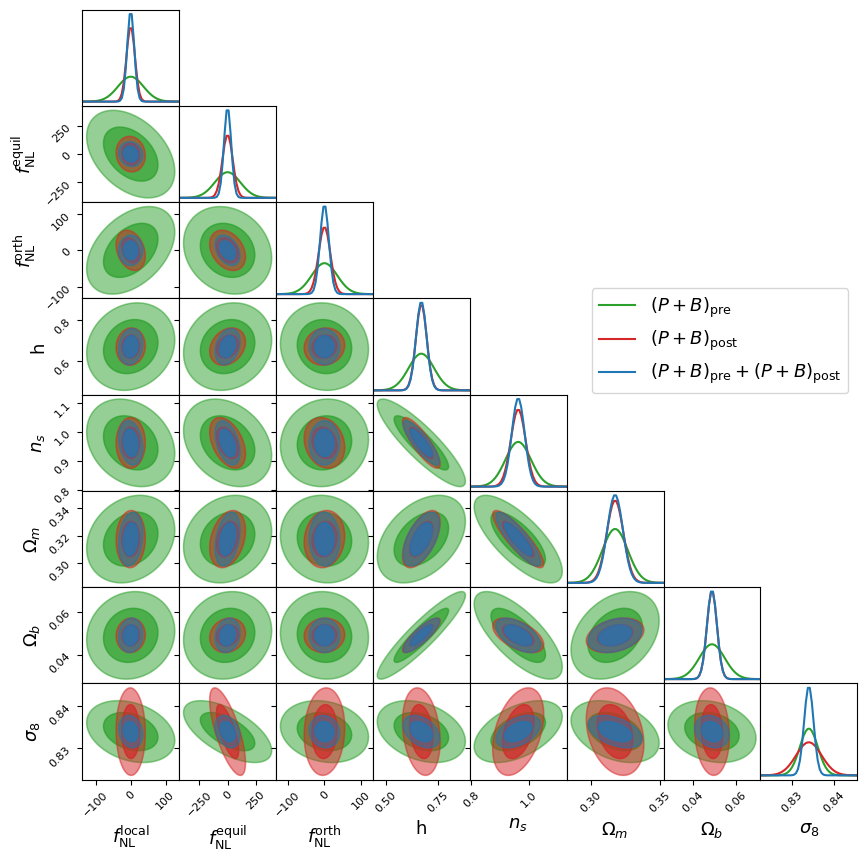

In [118]:
fig, axes = plt.subplots(figsize=(10, 10), sharey='row', sharex='col', ncols=8, nrows=8)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

x = np.linspace(0, 10, 100)
axes[0,0].set_yticks([])
for i in range(8):
    axes[i,0].set_ylabel(params[i])
    for j in range(8):
        axes[i,j].tick_params(axis='both', which='major', labelsize=8,rotation=45)
        # ax.tick_params(axis='both', which='minor', labelsize=8)
        if i<=j:
            axes[i, j].axis('off')
        else:

            axes[i,j].set_xlabel(params[j])
            
            
            C = Fish_PB_pre_Inv[[j,i],:][:,[j,i]]
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:green'}, fill_kwargs={'alpha':0.5,'c':'tab:green'})
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:green'}, fill_kwargs={'alpha':0.7,'c':'tab:green'})
            
            C = Fish_PB_post_Inv[[j,i],:][:,[j,i]]
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.5,'c':'tab:red'})
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.7,'c':'tab:red'})
            
            C = Fish_PB_both_Inv[[j,i],:][:,[j,i]]
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:blue'}, fill_kwargs={'alpha':0.5,'c':'tab:blue'})
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:blue'}, fill_kwargs={'alpha':0.7,'c':'tab:blue'})
            # C = FishNG_PB_mix_Inv[-1][[j,i],:][:,[j,i]]
            # plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.3,'c':'tab:red'})
            # plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.5,'c':'tab:red'})
axes[0,0].set_ylim(axes[0,0].get_xlim())
axes[-1,-1].set_xlim(axes[-1,-1].get_ylim())
a=1
for i in range(8):
    for j in range(8):
        if i==j:
            ax1 = fig.add_subplot(8,8,a)
            xlims = axes[i,i].get_xlim()
            ax1.set_xlim(xlims)
            ax1.set_yticks([])
            if i!=7: ax1.set_xticks([])
            ax1.tick_params(axis='both', which='major', labelsize=8,rotation=45)
            xx = np.linspace(xlims[0],xlims[1])
    
            
            sigma2 = Fish_PB_pre_Inv[i,i]
            ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2)/sigma2**.5,'tab:green')
            
            sigma2 = Fish_PB_post_Inv[i,i]
            ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2)/sigma2**.5,'tab:red')
            
            sigma2 = Fish_PB_both_Inv[i,i]
            ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2)/sigma2**.5,'tab:blue')
            
            # sigma2 = FishNG_PB_mix_Inv[-1][i,i]
            # ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2),'tab:red')
        a+=1 
ax1.set_xlabel(params[-1])
plt.legend(['$(P+B)_{\\rm pre}$','$(P+B)_{\\rm post}$','$(P+B)_{\\rm pre}+(P+B)_{\\rm post}$'],bbox_to_anchor=[1.0,5.2])
plt.savefig('results/cornerplot_PB.pdf',format='pdf',bbox_inches='tight')
plt.show()

## Check that we get unbiased estimates of $f_{\rm NL}$

In [37]:
ests = Fish_PB_both_Inv[0].dot(dPBdf_both).dot(Cov_PB_both_Inv_wHartlap).dot((PB_fiducial_both-PB_fiducial_both.mean(0)).T)
print(ests.mean(), ests.std())

PB_LC_m_both = np.concatenate([PB_LC_m_pre,PB_LC_m_post],axis=-1)
ests = Fish_PB_both_Inv[0].dot(dPBdf_both).dot(Cov_PB_both_Inv_wHartlap).dot((PB_LC_m_both-PB_fiducial_both.mean(0)).T)
print(ests.mean(), ests.std())

PB_LC_p_both = np.concatenate([PB_LC_p_pre,PB_LC_p_post],axis=-1)
ests = Fish_PB_both_Inv[0].dot(dPBdf_both).dot(Cov_PB_both_Inv_wHartlap).dot((PB_LC_p_both-PB_fiducial_both.mean(0)).T)
print(ests.mean(), ests.std())

2.0780316845048218e-12 11.16012880254218
-98.73446690272165 11.99469612076207
101.26553309727676 12.023912638743262


In [38]:
ests = Fish_PB_both_Inv[0].dot(dPBdf_both).dot(Cov_PB_both_Inv_wHartlap).dot((PB_fiducial_both-PB_fiducial_both.mean(0)).T)
print(ests.mean(), ests.std())

PB_s8_m_both = np.concatenate([PB_s8_m_pre,PB_s8_m_post],axis=-1)
ests = Fish_PB_both_Inv[0].dot(dPBdf_both).dot(Cov_PB_both_Inv_wHartlap).dot((PB_s8_m_both-PB_fiducial_both.mean(0)).T)
print(ests.mean(), ests.std())

PB_s8_p_both = np.concatenate([PB_s8_p_pre,PB_s8_p_post],axis=-1)
ests = Fish_PB_both_Inv[0].dot(dPBdf_both).dot(Cov_PB_both_Inv_wHartlap).dot((PB_s8_p_both-PB_fiducial_both.mean(0)).T)
print(ests.mean(), ests.std())

2.0780316845048218e-12 11.16012880254218
1.2591127593047808 11.01651075091626
1.2591127593093943 11.005755229658991


## Compute the results with only the tree level primordial Bispectra (as done in previous works)

In [39]:
from PrimordialPowerspectrum import *
zi = 0
transfer_data = np.genfromtxt("LinearTransfer.dat")
kh_transfer = transfer_data[:,0]
Tc = transfer_data[:,1:]
Tc = Tc[:,zi]
k_transfer = kh_transfer*h
TFint = interpolate(kh_transfer,Tc)

In [ ]:
import vegas
from PrimordialBispectra import *
bin_indices = bin_centers.copy()
def AnalyticIntegrand(k,ka,kb,kc,BShape,VVV):
    k1 = k[:,0]
    k2 = k[:,1]
    theta1=k[:,2]
    
    k3 = np.sqrt(k1**2 + k2**2 + 2*k1*k2*np.cos(theta1))
    
    dVol = 4*np.pi * 2*np.pi * k1**2 * k2**2 * np.sin(theta1)
    dk = 3
    bools = k1 < ka-dk*kF/2
    bools+= k1 > ka+dk*kF/2
    bools+= k2 < kb-dk*kF/2
    bools+= k2 > kb+dk*kF/2
    bools+= k3 < kc-dk*kF/2
    bools+= k3 > kc+dk*kF/2
    bools+= k1 + k2 < k3
    bools+= k2 + k3 < k1
    bools+= k1 + k3 < k2
    
    if VVV:
        B = np.ones_like(k1)
    else:
        P1prim = P(k1*h)
        P2prim = P(k2*h)
        P3prim = P(k3*h)
        TFk1 = TFint(k1)
        TFk2 = TFint(k2)
        TFk3 = TFint(k3)
        if BShape==BOrthoLSS:
            B = h**6 * TFk1 * TFk2 * TFk3 * BOrthoLSS(k1,k2,k3,P1prim,P2prim,P3prim)
        else:
            B = h**6 * TFk1 * TFk2 * TFk3 * BShape(P1prim,P2prim,P3prim)
        
    B[bools] = 0
    
    return B * dVol

def B_Analytic(tr_i,BShape,VVV,rtol=1e-3,verbose=0):
    dk = 3
    ka, kb, kc = bin_indices[tr_i]*kF

    @vegas.batchintegrand
    def integrandbatch(k):
        return AnalyticIntegrand(k,ka,kb,kc,BShape,VVV)

    integ = vegas.Integrator([[ka-dk*kF/2,ka+dk*kF/2],[kb-dk*kF/2,kb+dk*kF/2],[0,np.pi]])
    
    post = integ(integrandbatch,nitn=10,neval=1e5,rtol=rtol)
    if verbose!=0:
        print(post.summary())

    results = integ(integrandbatch,nitn=100,neval=1e5,rtol=rtol)
    if verbose!=0:
        print(results.summary())
        
    mean = results.mean
    rerr = np.abs(results.sdev/mean)
    Q = results.Q

    return Q, mean, rerr

V_tree = np.array(Parallel(n_jobs=-1,verbose=1)([delayed(B_Analytic)(i,BLocal,VVV=True) for i in range(len(bin_indices))]))[:,-2]
B_Loc_tree = np.array(Parallel(n_jobs=-1,verbose=1)([delayed(B_Analytic)(i,BLocal,VVV=False) for i in range(len(bin_indices))]))[:,-2] / V_tree
B_Eq_tree = np.array(Parallel(n_jobs=-1,verbose=1)([delayed(B_Analytic)(i,BEquil,VVV=False) for i in range(len(bin_indices))]))[:,-2] / V_tree
B_Ort_tree = np.array(Parallel(n_jobs=-1,verbose=1)([delayed(B_Analytic)(i,BOrthoLSS,VVV=False) for i in range(len(bin_indices))]))[:,-2] / V_tree

In [36]:
dBdf_pretree = dBdf_pre.copy()
dBdf_pretree[0] = B_Loc_tree[squeezed_ordering]
dBdf_pretree[1] = B_Eq_tree[squeezed_ordering]
dBdf_pretree[2] = B_Ort_tree[squeezed_ordering]

dBdf_posttree = dBdf_post.copy()
dBdf_posttree[0] = B_Loc_tree[squeezed_ordering]
dBdf_posttree[1] = B_Eq_tree[squeezed_ordering]
dBdf_posttree[2] = B_Ort_tree[squeezed_ordering]

In [37]:
FishPreTree = dBdf_pretree.dot(Cov_B_pre_Inv_wHartlap).dot(dBdf_pretree.T)
FishPostTree = dBdf_posttree.dot(Cov_B_post_Inv_wHartlap).dot(dBdf_posttree.T)
FishPreTreeInv = np.linalg.inv(FishPreTree)
FishPostTreeInv= np.linalg.inv(FishPostTree)

In [38]:
FishPreTreeInv[0,0]**.5 / FishPostTreeInv[0,0]**.5,\
FishPreTreeInv[1,1]**.5 / FishPostTreeInv[1,1]**.5,\
FishPreTreeInv[2,2]**.5 / FishPostTreeInv[2,2]**.5

(11.700327182214282, 4.753980558620786, 2.142626385746235)

In [39]:
Fish_B_pre_Inv[0,0]**.5 / Fish_B_post_Inv[0,0]**.5,\
Fish_B_pre_Inv[1,1]**.5 / Fish_B_post_Inv[1,1]**.5,\
Fish_B_pre_Inv[2,2]**.5 / Fish_B_post_Inv[2,2]**.5

(5.550370303848086, 2.5843907537341577, 3.1157644448850115)

## Convergence Test

In [88]:
def conv_P(N):
    Cov_P_pre = np.cov(Pk_fiducial_pre[:N].T)
    Cov_P_pre_Inv = np.linalg.inv(Cov_P_pre)
    
    N_sims = len(Pk_fiducial_pre[:N])
    N_bins = len(Cov_P_pre)
    hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
    print(N_sims,N_bins,hartlapfactor)
    Cov_P_pre_Inv_wHartlap = Cov_P_pre_Inv * hartlapfactor
    
    Cov_P_post = np.cov(Pk_fiducial_post[:N].T)
    Cov_P_post_Inv = np.linalg.inv(Cov_P_post)
    
    N_sims = len(Pk_fiducial_post[:N])
    N_bins = len(Cov_P_post)
    hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
    print(N_sims,N_bins,hartlapfactor)
    Cov_P_post_Inv_wHartlap = Cov_P_post_Inv * hartlapfactor
    
    Pk_fiducial_both = np.concatenate([Pk_fiducial_pre,Pk_fiducial_post],axis=-1)
    Cov_P_both = np.cov(Pk_fiducial_both[:N].T)
    Cov_P_both_Inv = np.linalg.inv(Cov_P_both)
    
    N_sims = len(Pk_fiducial_both[:N])
    N_bins = len(Cov_P_both)
    hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
    print(N_sims,N_bins,hartlapfactor)
    Cov_P_both_Inv_wHartlap = Cov_P_both_Inv * hartlapfactor

    Fish_P_pre = dPdf_pre.dot(Cov_P_pre_Inv_wHartlap).dot(dPdf_pre.T)
    Fish_P_post = dPdf_post.dot(Cov_P_post_Inv_wHartlap).dot(dPdf_post.T)
    Fish_P_both = dPdf_both.dot(Cov_P_both_Inv_wHartlap).dot(dPdf_both.T)

    Fish_P_pre_Inv = np.linalg.inv(Fish_P_pre)
    Fish_P_post_Inv = np.linalg.inv(Fish_P_post)
    Fish_P_both_Inv = np.linalg.inv(Fish_P_both)

    return np.diag(Fish_P_pre_Inv)**.5,np.diag(Fish_P_post_Inv)**.5,np.diag(Fish_P_both_Inv)**.5

conv_P(4800)

4800 81 0.9829131068972703
4800 81 0.9829131068972703
4800 162 0.9660345905396958


(array([2.89203425e+03, 7.95579431e+03, 3.43845051e+03, 4.28700926e-01,
        4.85668907e-01, 6.71435694e-02, 3.15754104e-02, 8.33126119e-02]),
 array([1.89937563e+03, 3.51869237e+03, 5.75741056e+02, 7.52033839e-02,
        1.04636146e-01, 2.02005159e-02, 4.47149482e-03, 3.50434492e-02]),
 array([1.35453022e+02, 4.80149311e+02, 1.73739858e+02, 5.12778301e-02,
        6.04274250e-02, 1.26646725e-02, 3.69737027e-03, 5.82954661e-03]))

In [87]:
def conv_B(N):
    Cov_B_pre = np.cov(Bk_fiducial_pre[:N].T)
    Cov_B_pre_Inv = np.linalg.inv(Cov_B_pre)
    
    N_sims = len(Bk_fiducial_pre[:N])
    N_bins = len(Cov_B_pre)
    hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
    print(N_sims,N_bins,hartlapfactor)
    Cov_B_pre_Inv_wHartlap = Cov_B_pre_Inv * hartlapfactor
    
    Cov_B_post = np.cov(Bk_fiducial_post[:N].T)
    Cov_B_post_Inv = np.linalg.inv(Cov_B_post)
    
    N_sims = len(Bk_fiducial_post[:N])
    N_bins = len(Cov_B_post)
    hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
    print(N_sims,N_bins,hartlapfactor)
    Cov_B_post_Inv_wHartlap = Cov_B_post_Inv * hartlapfactor
    
    Bk_fiducial_both = np.concatenate([Bk_fiducial_pre,Bk_fiducial_post],axis=-1)
    Cov_B_both = np.cov(Bk_fiducial_both[:N].T)
    Cov_B_both_Inv = np.linalg.inv(Cov_B_both)
    
    N_sims = len(Bk_fiducial_both[:N])
    N_bins = len(Cov_B_both)
    hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
    print(N_sims,N_bins,hartlapfactor)
    Cov_B_both_Inv_wHartlap = Cov_B_both_Inv * hartlapfactor

    Fish_B_pre = dBdf_pre.dot(Cov_B_pre_Inv_wHartlap).dot(dBdf_pre.T)
    Fish_B_post = dBdf_post.dot(Cov_B_post_Inv_wHartlap).dot(dBdf_post.T)
    Fish_B_both = dBdf_both.dot(Cov_B_both_Inv_wHartlap).dot(dBdf_both.T)

    Fish_B_pre_Inv = np.linalg.inv(Fish_B_pre)
    Fish_B_post_Inv = np.linalg.inv(Fish_B_post)
    Fish_B_both_Inv = np.linalg.inv(Fish_B_both)

    return np.diag(Fish_B_pre_Inv)**.5,np.diag(Fish_B_post_Inv)**.5,np.diag(Fish_B_both_Inv)**.5

conv_B(4800)

4800 2276 0.525526151281517
4800 2276 0.525526151281517
4800 4552 0.05126067930818921


(array([1.00404164e+02, 1.89385375e+02, 8.44151719e+01, 1.60407939e-01,
        1.48665176e-01, 2.65284482e-02, 1.29646765e-02, 8.41519817e-03]),
 array([1.84628227e+01, 7.40491760e+01, 2.66398549e+01, 1.16255632e-01,
        7.84736634e-02, 1.79428755e-02, 1.16294115e-02, 5.92694666e-03]),
 array([1.74195739e+01, 6.47878442e+01, 2.22218506e+01, 8.84486180e-02,
        6.33194819e-02, 1.36733621e-02, 8.46600258e-03, 3.09278109e-03]))

In [ ]:
def conv_PB(N):
    Cov_PB_pre = np.cov(PB_fiducial_pre[:N].T)
    Cov_PB_pre_Inv = np.linalg.inv(Cov_PB_pre)
    
    N_sims = len(PB_fiducial_pre[:N])
    N_bins = len(Cov_PB_pre)
    hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
    print(N_sims,N_bins,hartlapfactor)
    Cov_PB_pre_Inv_wHartlap = Cov_PB_pre_Inv * hartlapfactor
    
    Cov_PB_post = np.cov(PB_fiducial_post[:N].T)
    Cov_PB_post_Inv = np.linalg.inv(Cov_PB_post)
    
    N_sims = len(PB_fiducial_post[:N])
    N_bins = len(Cov_PB_post)
    hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
    print(N_sims,N_bins,hartlapfactor)
    Cov_PB_post_Inv_wHartlap = Cov_PB_post_Inv * hartlapfactor
    
    PB_fiducial_both = np.concatenate([PB_fiducial_pre,PB_fiducial_post],axis=-1)
    Cov_PB_both = np.cov(PB_fiducial_both[:N].T)
    Cov_PB_both_Inv = np.linalg.inv(Cov_PB_both)
    
    N_sims = len(PB_fiducial_both[:N])
    N_bins = len(Cov_PB_both)
    hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
    print(N_sims,N_bins,hartlapfactor)
    Cov_PB_both_Inv_wHartlap = Cov_PB_both_Inv * hartlapfactor

    Fish_PB_pre = dPBdf_pre.dot(Cov_PB_pre_Inv_wHartlap).dot(dPBdf_pre.T)
    Fish_PB_post = dPBdf_post.dot(Cov_PB_post_Inv_wHartlap).dot(dPBdf_post.T)
    Fish_PB_both = dPBdf_both.dot(Cov_PB_both_Inv_wHartlap).dot(dPBdf_both.T)

    Fish_PB_pre_Inv = np.linalg.inv(Fish_PB_pre)
    Fish_PB_post_Inv = np.linalg.inv(Fish_PB_post)
    Fish_PB_both_Inv = np.linalg.inv(Fish_PB_both)

    return np.diag(Fish_PB_pre_Inv)**.5,np.diag(Fish_PB_post_Inv)**.5,np.diag(Fish_PB_both_Inv)**.5

conv_PB(4800)

In [46]:
Ns = np.arange(4800,12501,100)

In [49]:
from joblib import Parallel, delayed

In [89]:
convs_P = np.array(Parallel(n_jobs=-1,verbose=10)([delayed(conv_P)(N) for N in Ns[::-1]]))[::-1]
convs_B = np.array(Parallel(n_jobs=-1,verbose=10)([delayed(conv_B)(N) for N in Ns[::-1]]))[::-1]
convs_PB = np.array(Parallel(n_jobs=-1,verbose=10)([delayed(conv_PB)(N) for N in Ns[::-1]]))[::-1]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1865s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1017s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  71 out of  78 | elapsed:    0.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done  16 ta

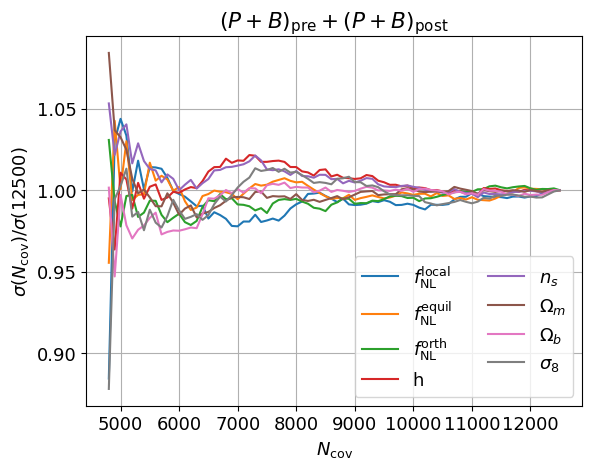

In [129]:
plt.plot(Ns,(convs_PB / convs_PB[-1])[:,2,:])
plt.legend(params,ncols=2)
plt.title('$(P+B)_{\\rm{pre}}+(P+B)_{\\rm{post}}$')
plt.xlabel("$N_{\\rm cov}$")
plt.ylabel("$\sigma(N_{\\rm cov})/\sigma(12500)$")
plt.grid()
plt.show()

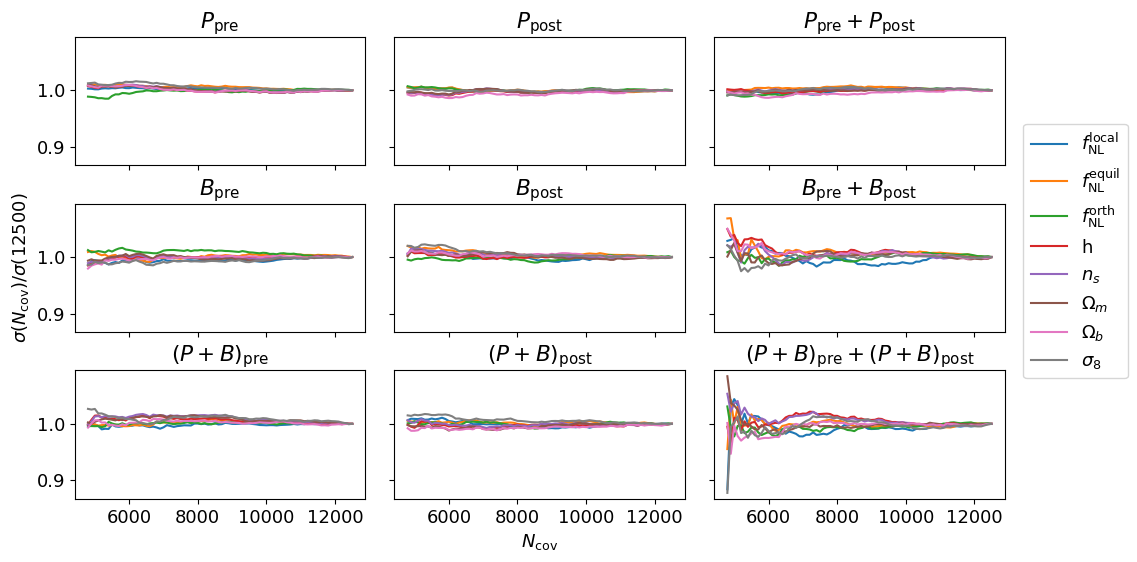

In [266]:
fig = plt.figure(figsize=(12,6))
gs = fig.add_gridspec(3, 3, wspace=.1,hspace=.3)
ax = gs.subplots(sharex=True, sharey=True)

ax[0,0].plot(Ns,(convs_P / convs_P[-1])[:,0,:])
ax[0,0].set_title('$P_{\\rm{pre}}$')
ax[0,1].plot(Ns,(convs_P / convs_P[-1])[:,1,:])
ax[0,1].set_title('$P_{\\rm{post}}$')
ax[0,2].plot(Ns,(convs_P / convs_P[-1])[:,2,:])
ax[0,2].set_title('$P_{\\rm{pre}}+P_{\\rm{post}}$')

ax[1,0].plot(Ns,(convs_B / convs_B[-1])[:,0,:])
ax[1,0].set_title('$B_{\\rm{pre}}$')
ax[1,1].plot(Ns,(convs_B / convs_B[-1])[:,1,:])
ax[1,1].set_title('$B_{\\rm{post}}$')
ax[1,2].plot(Ns,(convs_B / convs_B[-1])[:,2,:])
ax[1,2].set_title('$B_{\\rm{pre}}+B_{\\rm{post}}$')

ax[2,0].plot(Ns,(convs_PB / convs_PB[-1])[:,0,:])
ax[2,0].set_title('$(P+B)_{\\rm{pre}}$')
ax[2,1].plot(Ns,(convs_PB / convs_PB[-1])[:,1,:])
ax[2,1].set_title('$(P+B)_{\\rm{post}}$')
ax[2,2].plot(Ns,(convs_PB / convs_PB[-1])[:,2,:])
ax[2,2].set_title('$(P+B)_{\\rm{pre}}+(P+B)_{\\rm{post}}$')


fig.legend(params,bbox_to_anchor=(1.01, 0.75))

ax[2,1].set_xlabel("$N_{\\rm cov}$")
ax[1,0].set_ylabel("$\sigma(N_{\\rm cov})/\sigma(12500)$")

# ax[1].grid()
# ax[1].set_xlabel("$N_{\\rm cov}$")
# ax[2].grid()

# fig.tight_layout()
fig.savefig('results/convergence_cov.pdf',format='pdf',bbox_inches='tight')
fig.show()

In [221]:
def deriv_P(N):
    dPdf_pre = np.zeros((8,Pk_fiducial_pre[:N].mean(0).shape[0]))
    dPdf_pre[0] = (Pk_LC_p_pre[:N].mean(0) - Pk_LC_m_pre[:N].mean(0))/200.
    dPdf_pre[1] = (Pk_EQ_p_pre[:N].mean(0) - Pk_EQ_m_pre[:N].mean(0))/200.
    dPdf_pre[2] = (Pk_OR_LSS_p_pre[:N].mean(0) - Pk_OR_LSS_m_pre[:N].mean(0))/200.
    dPdf_pre[3] = (Pk_h_p_pre[:N].mean(0) - Pk_h_m_pre[:N].mean(0))/(0.6911-0.6511)
    dPdf_pre[4] = (Pk_ns_p_pre[:N].mean(0) - Pk_ns_m_pre[:N].mean(0))/(0.9824-0.9424)
    dPdf_pre[5] = (Pk_Om_p_pre[:N].mean(0) - Pk_Om_m_pre[:N].mean(0))/(0.3275-0.3075)
    dPdf_pre[6] = (Pk_Ob2_p_pre[:N].mean(0) - Pk_Ob2_m_pre[:N].mean(0))/(0.051-0.047)
    dPdf_pre[7] = (Pk_s8_p_pre[:N].mean(0) - Pk_s8_m_pre[:N].mean(0))/(0.849-0.819)
    
    dPdf_post = np.zeros((8,Pk_fiducial_post[:N].mean(0).shape[0]))
    dPdf_post[0] = (Pk_LC_p_post[:N].mean(0) - Pk_LC_m_post[:N].mean(0))/200.
    dPdf_post[1] = (Pk_EQ_p_post[:N].mean(0) - Pk_EQ_m_post[:N].mean(0))/200.
    dPdf_post[2] = (Pk_OR_LSS_p_post[:N].mean(0) - Pk_OR_LSS_m_post[:N].mean(0))/200.
    dPdf_post[3] = (Pk_h_p_post[:N].mean(0) - Pk_h_m_post[:N].mean(0))/(0.6911-0.6511)
    dPdf_post[4] = (Pk_ns_p_post[:N].mean(0) - Pk_ns_m_post[:N].mean(0))/(0.9824-0.9424)
    dPdf_post[5] = (Pk_Om_p_post[:N].mean(0) - Pk_Om_m_post[:N].mean(0))/(0.3275-0.3075)
    dPdf_post[6] = (Pk_Ob2_p_post[:N].mean(0) - Pk_Ob2_m_post[:N].mean(0))/(0.051-0.047)
    dPdf_post[7] = (Pk_s8_p_post[:N].mean(0) - Pk_s8_m_post[:N].mean(0))/(0.849-0.819)
    
    dPdf_both = np.concatenate([dPdf_pre,dPdf_post],axis=-1)

    Fish_P_pre = dPdf_pre.dot(Cov_P_pre_Inv_wHartlap).dot(dPdf_pre.T)
    Fish_P_post = dPdf_post.dot(Cov_P_post_Inv_wHartlap).dot(dPdf_post.T)
    Fish_P_both = dPdf_both.dot(Cov_P_both_Inv_wHartlap).dot(dPdf_both.T)

    Fish_P_pre_Inv = np.linalg.inv(Fish_P_pre)
    Fish_P_post_Inv = np.linalg.inv(Fish_P_post)
    Fish_P_both_Inv = np.linalg.inv(Fish_P_both)

    return np.diag(Fish_P_pre_Inv)**.5,np.diag(Fish_P_post_Inv)**.5,np.diag(Fish_P_both_Inv)**.5

In [222]:
def deriv_B(N):
    dBdf_pre = np.zeros((8,Bk_fiducial_pre[:N].mean(0).shape[0]))
    dBdf_pre[0] = (Bk_LC_p_pre[:N].mean(0) - Bk_LC_m_pre[:N].mean(0))/200.
    dBdf_pre[1] = (Bk_EQ_p_pre[:N].mean(0) - Bk_EQ_m_pre[:N].mean(0))/200.
    dBdf_pre[2] = (Bk_OR_LSS_p_pre[:N].mean(0) - Bk_OR_LSS_m_pre[:N].mean(0))/200.
    dBdf_pre[3] = (Bk_h_p_pre[:N].mean(0) - Bk_h_m_pre[:N].mean(0))/(0.6911-0.6511)
    dBdf_pre[4] = (Bk_ns_p_pre[:N].mean(0) - Bk_ns_m_pre[:N].mean(0))/(0.9824-0.9424)
    dBdf_pre[5] = (Bk_Om_p_pre[:N].mean(0) - Bk_Om_m_pre[:N].mean(0))/(0.3275-0.3075)
    dBdf_pre[6] = (Bk_Ob2_p_pre[:N].mean(0) - Bk_Ob2_m_pre[:N].mean(0))/(0.051-0.047)
    dBdf_pre[7] = (Bk_s8_p_pre[:N].mean(0) - Bk_s8_m_pre[:N].mean(0))/(0.849-0.819)
    
    dBdf_post = np.zeros((8,Bk_fiducial_post[:N].mean(0).shape[0]))
    dBdf_post[0] = (Bk_LC_p_post[:N].mean(0) - Bk_LC_m_post[:N].mean(0))/200.
    dBdf_post[1] = (Bk_EQ_p_post[:N].mean(0) - Bk_EQ_m_post[:N].mean(0))/200.
    dBdf_post[2] = (Bk_OR_LSS_p_post[:N].mean(0) - Bk_OR_LSS_m_post[:N].mean(0))/200.
    dBdf_post[3] = (Bk_h_p_post[:N].mean(0) - Bk_h_m_post[:N].mean(0))/(0.6911-0.6511)
    dBdf_post[4] = (Bk_ns_p_post[:N].mean(0) - Bk_ns_m_post[:N].mean(0))/(0.9824-0.9424)
    dBdf_post[5] = (Bk_Om_p_post[:N].mean(0) - Bk_Om_m_post[:N].mean(0))/(0.3275-0.3075)
    dBdf_post[6] = (Bk_Ob2_p_post[:N].mean(0) - Bk_Ob2_m_post[:N].mean(0))/(0.051-0.047)
    dBdf_post[7] = (Bk_s8_p_post[:N].mean(0) - Bk_s8_m_post[:N].mean(0))/(0.849-0.819)
    
    dBdf_both = np.concatenate([dBdf_pre,dBdf_post],axis=-1)

    Fish_B_pre = dBdf_pre.dot(Cov_B_pre_Inv_wHartlap).dot(dBdf_pre.T)
    Fish_B_post = dBdf_post.dot(Cov_B_post_Inv_wHartlap).dot(dBdf_post.T)
    Fish_B_both = dBdf_both.dot(Cov_B_both_Inv_wHartlap).dot(dBdf_both.T)

    Fish_B_pre_Inv = np.linalg.inv(Fish_B_pre)
    Fish_B_post_Inv = np.linalg.inv(Fish_B_post)
    Fish_B_both_Inv = np.linalg.inv(Fish_B_both)

    return np.diag(Fish_B_pre_Inv)**.5,np.diag(Fish_B_post_Inv)**.5,np.diag(Fish_B_both_Inv)**.5

In [223]:
def deriv_PB(N):
    dPBdf_pre = np.zeros((8,PB_fiducial_pre[:N].mean(0).shape[0]))
    dPBdf_pre[0] = (PB_LC_p_pre[:N].mean(0) - PB_LC_m_pre[:N].mean(0))/200.
    dPBdf_pre[1] = (PB_EQ_p_pre[:N].mean(0) - PB_EQ_m_pre[:N].mean(0))/200.
    dPBdf_pre[2] = (PB_OR_LSS_p_pre[:N].mean(0) - PB_OR_LSS_m_pre[:N].mean(0))/200.
    dPBdf_pre[3] = (PB_h_p_pre[:N].mean(0) - PB_h_m_pre[:N].mean(0))/(0.6911-0.6511)
    dPBdf_pre[4] = (PB_ns_p_pre[:N].mean(0) - PB_ns_m_pre[:N].mean(0))/(0.9824-0.9424)
    dPBdf_pre[5] = (PB_Om_p_pre[:N].mean(0) - PB_Om_m_pre[:N].mean(0))/(0.3275-0.3075)
    dPBdf_pre[6] = (PB_Ob2_p_pre[:N].mean(0) - PB_Ob2_m_pre[:N].mean(0))/(0.051-0.047)
    dPBdf_pre[7] = (PB_s8_p_pre[:N].mean(0) - PB_s8_m_pre[:N].mean(0))/(0.849-0.819)
    
    dPBdf_post = np.zeros((8,PB_fiducial_post[:N].mean(0).shape[0]))
    dPBdf_post[0] = (PB_LC_p_post[:N].mean(0) - PB_LC_m_post[:N].mean(0))/200.
    dPBdf_post[1] = (PB_EQ_p_post[:N].mean(0) - PB_EQ_m_post[:N].mean(0))/200.
    dPBdf_post[2] = (PB_OR_LSS_p_post[:N].mean(0) - PB_OR_LSS_m_post[:N].mean(0))/200.
    dPBdf_post[3] = (PB_h_p_post[:N].mean(0) - PB_h_m_post[:N].mean(0))/(0.6911-0.6511)
    dPBdf_post[4] = (PB_ns_p_post[:N].mean(0) - PB_ns_m_post[:N].mean(0))/(0.9824-0.9424)
    dPBdf_post[5] = (PB_Om_p_post[:N].mean(0) - PB_Om_m_post[:N].mean(0))/(0.3275-0.3075)
    dPBdf_post[6] = (PB_Ob2_p_post[:N].mean(0) - PB_Ob2_m_post[:N].mean(0))/(0.051-0.047)
    dPBdf_post[7] = (PB_s8_p_post[:N].mean(0) - PB_s8_m_post[:N].mean(0))/(0.849-0.819)
    
    dPBdf_both = np.concatenate([dPBdf_pre,dPBdf_post],axis=-1)

    Fish_PB_pre = dPBdf_pre.dot(Cov_PB_pre_Inv_wHartlap).dot(dPBdf_pre.T)
    Fish_PB_post = dPBdf_post.dot(Cov_PB_post_Inv_wHartlap).dot(dPBdf_post.T)
    Fish_PB_both = dPBdf_both.dot(Cov_PB_both_Inv_wHartlap).dot(dPBdf_both.T)

    Fish_PB_pre_Inv = np.linalg.inv(Fish_PB_pre)
    Fish_PB_post_Inv = np.linalg.inv(Fish_PB_post)
    Fish_PB_both_Inv = np.linalg.inv(Fish_PB_both)
    
    return np.diag(Fish_PB_pre_Inv)**.5,np.diag(Fish_PB_post_Inv)**.5,np.diag(Fish_PB_both_Inv)**.5

In [224]:
Ns_deriv = np.arange(0,501,10)[1:]

derivs_P = np.array([deriv_P(N) for N in Ns_deriv])
derivs_B = np.array([deriv_B(N) for N in Ns_deriv])
derivs_PB = np.array([deriv_PB(N) for N in Ns_deriv])

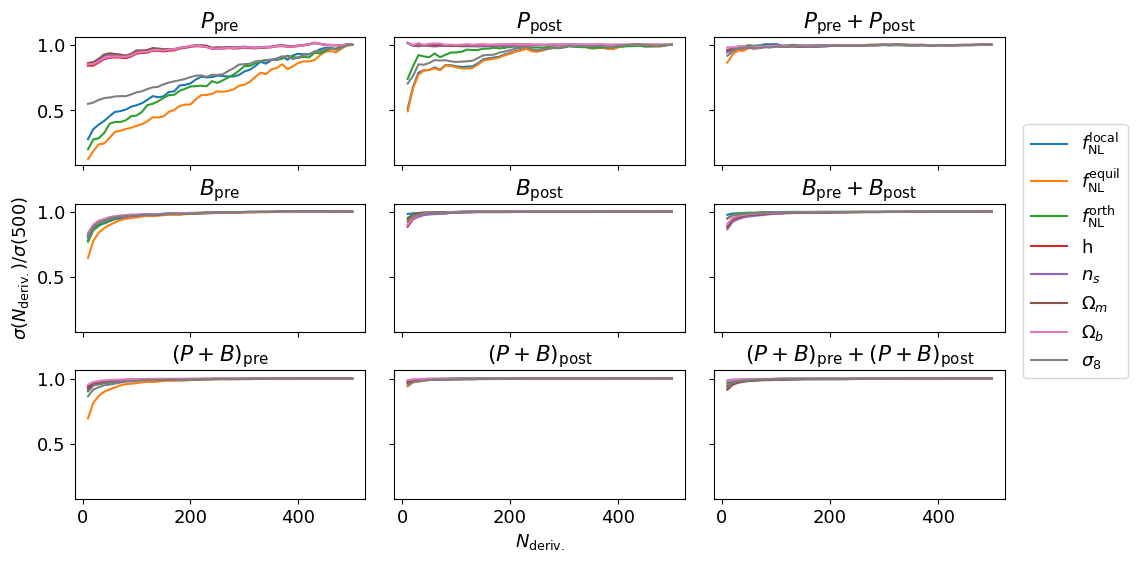

In [267]:
fig = plt.figure(figsize=(12,6))
gs = fig.add_gridspec(3, 3, wspace=.1,hspace=.3)
ax = gs.subplots(sharex=True, sharey=True)


ax[0,0].plot(Ns_deriv,(derivs_P / derivs_P[-1])[:,0,:])
ax[0,0].set_title('$P_{\\rm{pre}}$')
ax[0,1].plot(Ns_deriv,(derivs_P / derivs_P[-1])[:,1,:])
ax[0,1].set_title('$P_{\\rm{post}}$')
ax[0,2].plot(Ns_deriv,(derivs_P / derivs_P[-1])[:,2,:])
ax[0,2].set_title('$P_{\\rm{pre}}+P_{\\rm{post}}$')

ax[1,0].plot(Ns_deriv,(derivs_B / derivs_B[-1])[:,0,:])
ax[1,0].set_title('$B_{\\rm{pre}}$')
ax[1,1].plot(Ns_deriv,(derivs_B / derivs_B[-1])[:,1,:])
ax[1,1].set_title('$B_{\\rm{post}}$')
ax[1,2].plot(Ns_deriv,(derivs_B / derivs_B[-1])[:,2,:])
ax[1,2].set_title('$B_{\\rm{pre}}+B_{\\rm{post}}$')

ax[2,0].plot(Ns_deriv,(derivs_PB / derivs_PB[-1])[:,0,:])
ax[2,0].set_title('$(P+B)_{\\rm{pre}}$')
ax[2,1].plot(Ns_deriv,(derivs_PB / derivs_PB[-1])[:,1,:])
ax[2,1].set_title('$(P+B)_{\\rm{post}}$')
ax[2,2].plot(Ns_deriv,(derivs_PB / derivs_PB[-1])[:,2,:])
ax[2,2].set_title('$(P+B)_{\\rm{pre}}+(P+B)_{\\rm{post}}$')


fig.legend(params,bbox_to_anchor=(1.01, 0.75))

ax[2,1].set_xlabel("$N_{\\rm deriv.}$")
ax[1,0].set_ylabel("$\sigma(N_{\\rm deriv.})/\sigma(500)$")

# fig.tight_layout()
fig.savefig('results/convergence_deriv.pdf',format='pdf',bbox_inches='tight')
fig.show()